<a href="https://colab.research.google.com/github/Hanpablo/-course/blob/main/Final_Project_Syihan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
import glob
import numpy as np
import pandas as pd
import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#Import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = "/content/Univ/"
all_files = glob.glob(path+"*.csv")

all_files

['/content/Univ/2019-University-Rankings.csv',
 '/content/Univ/2023-University-Rankings.csv',
 '/content/Univ/2018-University-Rankings.csv',
 '/content/Univ/2021-2022-University-Rankings.csv']

In [ ]:
li = []

for filename in all_files:
  df = pd.read_csv(filename, index_col=None, header= 0)
  li.append(df)

li

[      rank_2019   rank_2018                                   institution  \
 0             1           1   MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)   
 1             2           2                           STANFORD UNIVERSITY   
 2             3           3                            HARVARD UNIVERSITY   
 3             4           4  CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH)   
 4             5           6                          UNIVERSITY OF OXFORD   
 ..          ...         ...                                           ...   
 890    801-1000    801-1000                             VERONA UNIVERSITY   
 891    801-1000    801-1000                     VORONEZH STATE UNIVERSITY   
 892    801-1000    801-1000                    VYTAUTAS MAGNUS UNIVERSITY   
 893    801-1000    801-1000                  WEST UNIVERSITY OF TIMISOARA   
 894    801-1000     751-800                           YEUNGNAM UNIVERSITY   
 
             country classification focus research_intensity  

In [ ]:
print(all_files)

['/content/Univ/2019-University-Rankings.csv', '/content/Univ/2023-University-Rankings.csv', '/content/Univ/2018-University-Rankings.csv', '/content/Univ/2021-2022-University-Rankings.csv']


In [ ]:
student = pd.read_csv("/content/student/student_performance_2022-2023.csv")

In [ ]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   university                   1000 non-null   object
 9   student_id                   1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   university                   1000 non-null   object
 9   student_id                   1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id
0,female,group B,bachelor's degree,standard,none,72,72,74,University of Essex,27330634
1,female,group C,some college,standard,completed,69,90,88,National Central University,92958629
2,female,group B,master's degree,standard,none,90,95,93,Université de Montpellier,31367409
3,male,group A,associate's degree,free/reduced,none,47,57,44,Washington State University,97210441
4,male,group C,some college,standard,none,76,78,75,Keele University,99937559
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,Université de Montpellier,70128954
996,male,group C,high school,free/reduced,none,62,55,55,National Taiwan University of Science and Tech...,84614760
997,female,group C,high school,free/reduced,completed,59,71,65,University of Basel,57161539
998,female,group D,some college,standard,completed,68,78,77,Texas A&M University,22522604


In [ ]:
test_course = student.query('`test preparation course` == "completed"')

In [ ]:
education = student.query('`parental level of education` in ["some college", "master\'s degree","bachelor\'s degree"]')

In [ ]:
fasilitas = pd.merge(test_course, education, how='inner')

print(fasilitas)

     gender race/ethnicity parental level of education         lunch  \
0    female        group C                some college      standard   
1    female        group B                some college      standard   
2      male        group A                some college      standard   
3      male        group C             master's degree  free/reduced   
4    female        group B                some college  free/reduced   
..      ...            ...                         ...           ...   
138    male        group B                some college  free/reduced   
139  female        group A                some college      standard   
140  female        group D                some college  free/reduced   
141  female        group E             master's degree      standard   
142  female        group D                some college      standard   

    test preparation course  math score  reading score  writing score  \
0                 completed          69             90        

In [ ]:
fasilitas

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id
0,female,group C,some college,standard,completed,69,90,88,National Central University,92958629
1,female,group B,some college,standard,completed,88,95,92,Universitas Gadjah Mada,56296476
2,male,group A,some college,standard,completed,78,72,70,Saint-Petersburg State University,14027052
3,male,group C,master's degree,free/reduced,completed,46,42,46,University of New Hampshire,64071278
4,female,group B,some college,free/reduced,completed,65,75,70,Universiti Utara Malaysia (UUM),51069097
...,...,...,...,...,...,...,...,...,...,...
138,male,group B,some college,free/reduced,completed,60,62,60,University of Delhi,15868506
139,female,group A,some college,standard,completed,78,87,91,Universität Regensburg,83080236
140,female,group D,some college,free/reduced,completed,67,86,83,Pontificia Universidad Católica del Perú,93350854
141,female,group E,master's degree,standard,completed,88,99,95,Université de Montpellier,70128954


In [ ]:
# fasilitas = pd.concat([test_course, education])

In [ ]:
# fasilitas

In [ ]:
math = student.query('`math score` >= 75')

In [ ]:
reading = student.query('`reading score` >= 75')

In [ ]:
writing = student.query('`writing score` >= 75')

In [ ]:
student_1 = pd.merge(math, reading, how='inner')

In [ ]:
student_score = pd.merge(student_1, writing, how='inner')

In [ ]:
student_score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id
0,female,group B,master's degree,standard,none,90,95,93,Université de Montpellier,31367409
1,male,group C,some college,standard,none,76,78,75,Keele University,99937559
2,female,group B,some college,standard,completed,88,95,92,Universitas Gadjah Mada,56296476
3,male,group C,high school,standard,none,88,89,86,E.A.Buketov Karaganda State University,32304553
4,male,group E,some college,standard,none,97,87,82,UCSI University,19966525
...,...,...,...,...,...,...,...,...,...,...
206,female,group A,some college,standard,completed,78,87,91,Universität Regensburg,83080236
207,male,group E,some high school,standard,completed,81,75,76,Swansea University,34568571
208,male,group E,high school,free/reduced,completed,86,81,75,University of Texas Dallas,98042127
209,female,group E,master's degree,standard,completed,88,99,95,Université de Montpellier,70128954


In [ ]:
student_all = pd.merge(fasilitas, student_score, how='inner')

In [ ]:
student_all

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id
0,female,group B,some college,standard,completed,88,95,92,Universitas Gadjah Mada,56296476
1,male,group A,bachelor's degree,standard,completed,80,78,81,Universidad Complutense de Madrid (UCM),28660332
2,male,group C,some college,standard,completed,98,86,90,Shanghai Jiao Tong University,67459938
3,female,group E,bachelor's degree,standard,completed,99,100,100,University of Oklahoma,99131099
4,female,group C,bachelor's degree,standard,completed,79,92,89,Ain Shams University,97987705
5,female,group C,some college,standard,completed,88,93,93,Universität Leipzig,53448996
6,female,group C,some college,standard,completed,75,81,84,Universidad Externado de Colombia,21430597
7,female,group E,some college,free/reduced,completed,75,88,85,Universiti Teknologi MARA (UiTM),61003868
8,female,group C,bachelor's degree,standard,completed,96,100,100,Utah State University,64385177
9,female,group C,master's degree,standard,completed,81,91,87,Université Paul Sabatier Toulouse III,65962357


In [ ]:
student_all.describe()

,math score,reading score,writing score,student_id
count,51.000000,51.000000,51.000000,5.100000e+01
mean,86.470588,88.901961,89.490196,5.979257e+07
std,7.494939,7.294532,7.187134,2.493172e+07
min,75.000000,77.000000,75.000000,1.114170e+07
25%,79.500000,83.000000,84.500000,3.925353e+07
50%,87.000000,88.000000,90.000000,6.100387e+07
75%,92.000000,95.500000,94.500000,7.788407e+07
max,100.000000,100.000000,100.000000,9.913110e+07


In [ ]:
student_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       51 non-null     object
 1   race/ethnicity               51 non-null     object
 2   parental level of education  51 non-null     object
 3   lunch                        51 non-null     object
 4   test preparation course      51 non-null     object
 5   math score                   51 non-null     int64 
 6   reading score                51 non-null     int64 
 7   writing score                51 non-null     int64 
 8   university                   51 non-null     object
 9   student_id                   51 non-null     int64 
dtypes: int64(4), object(6)
memory usage: 4.4+ KB


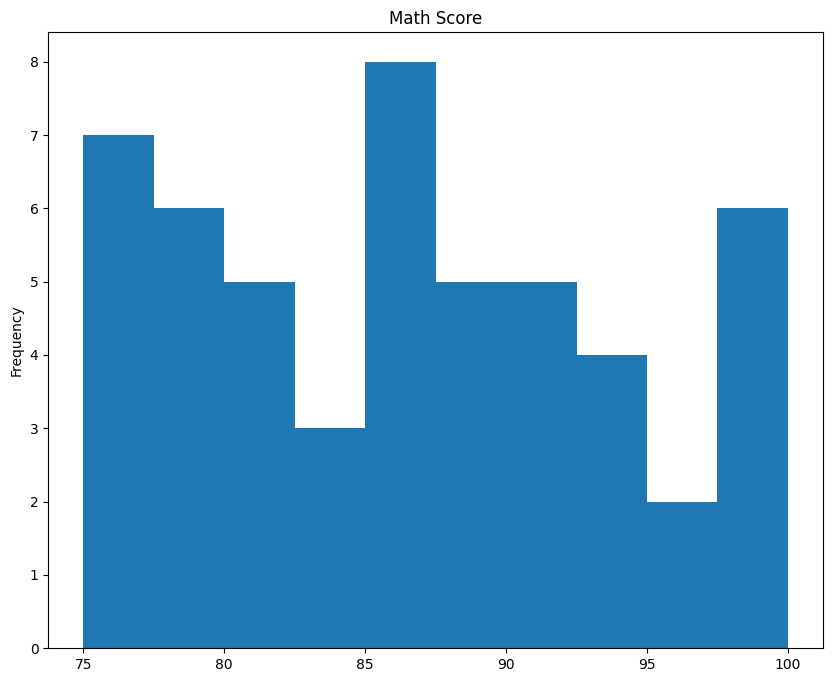

In [ ]:
student_all["math score"].plot.hist(figsize=(10,8))
plt.title("Math Score")
plt.show()

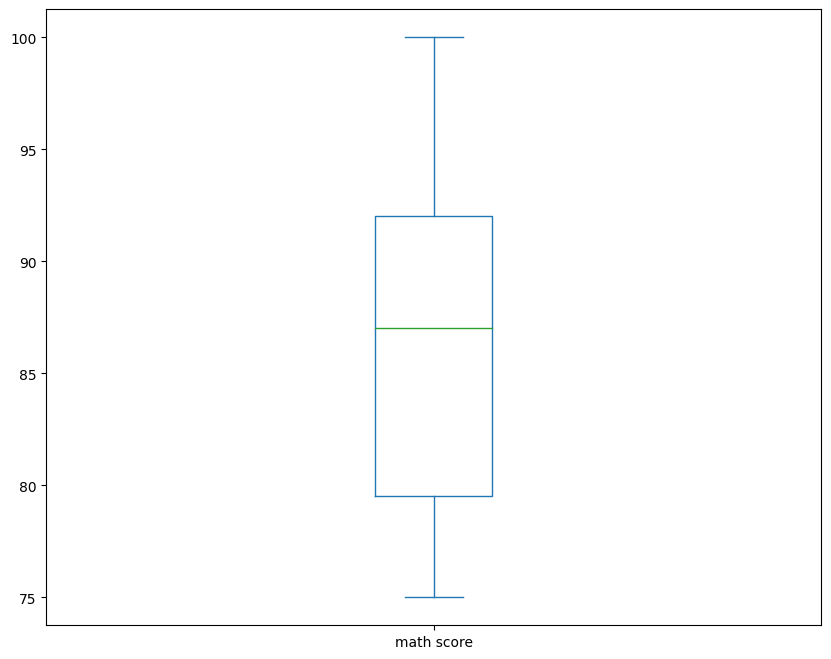

In [ ]:
student_all["math score"].plot.box(figsize=(10,8))
plt.show()

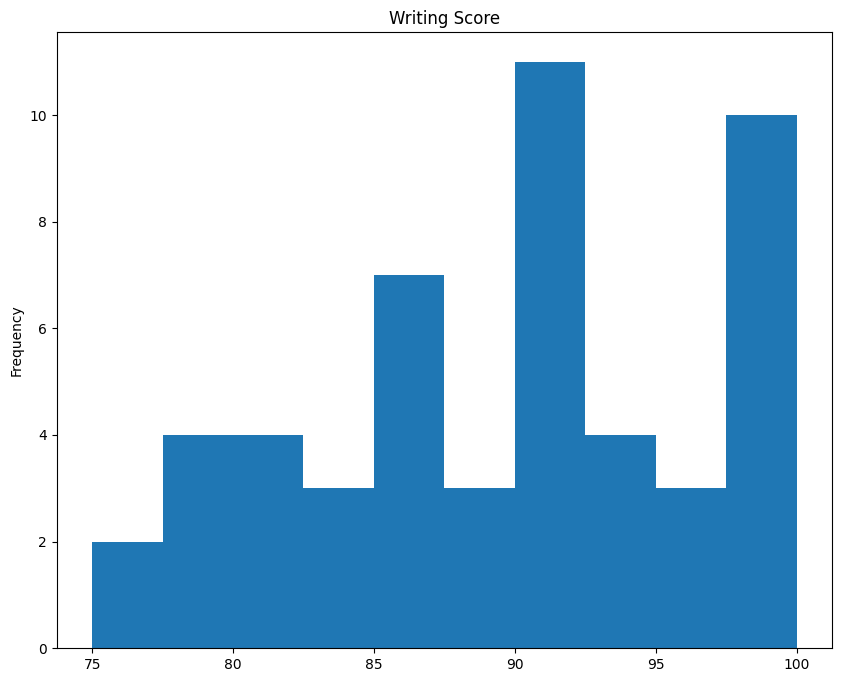

In [ ]:
student_all["writing score"].plot.hist(figsize=(10,8))
plt.title("Writing Score")
plt.show()

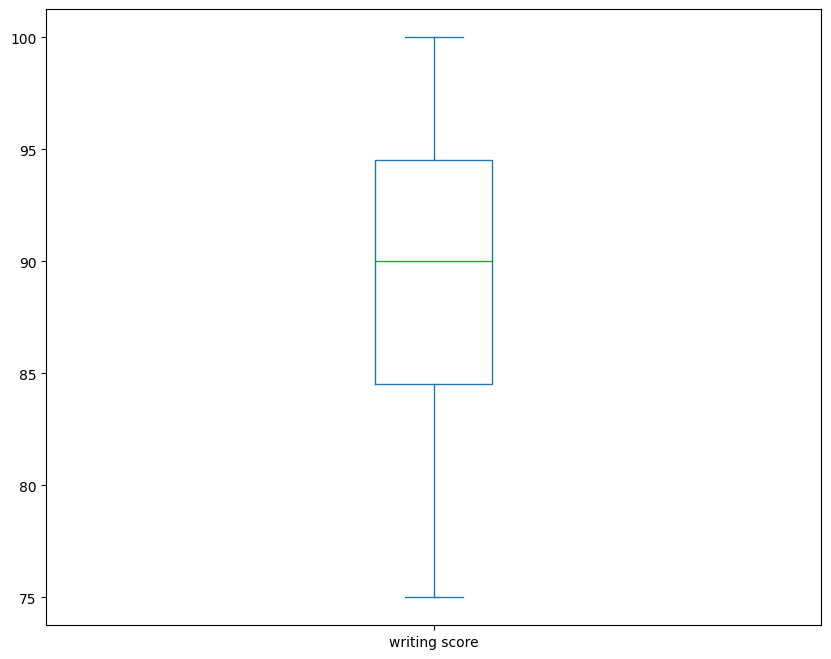

In [ ]:
student_all["writing score"].plot.box(figsize=(10,8))
plt.show()

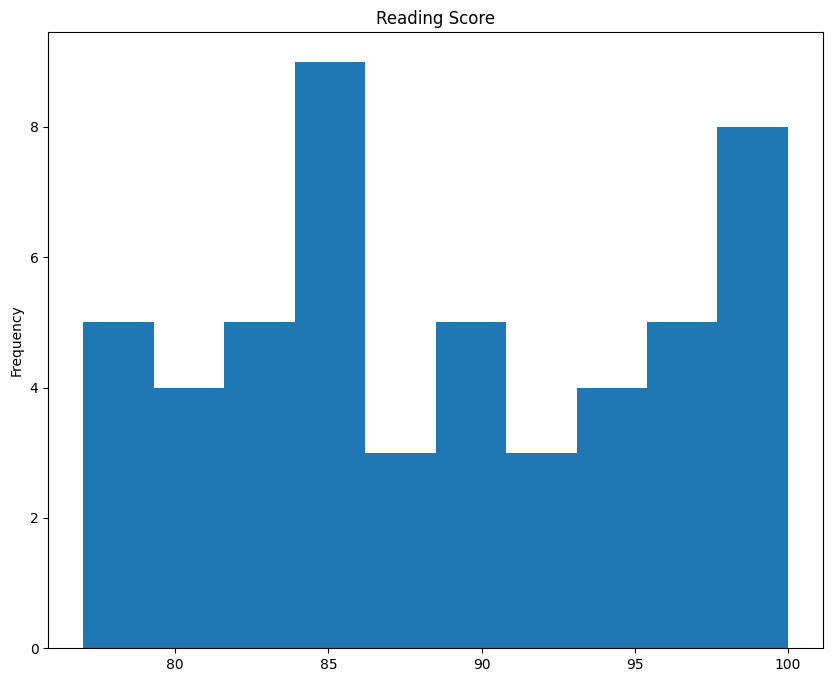

In [ ]:
student_all["reading score"].plot.hist(figsize=(10,8))
plt.title("Reading Score")
plt.show()

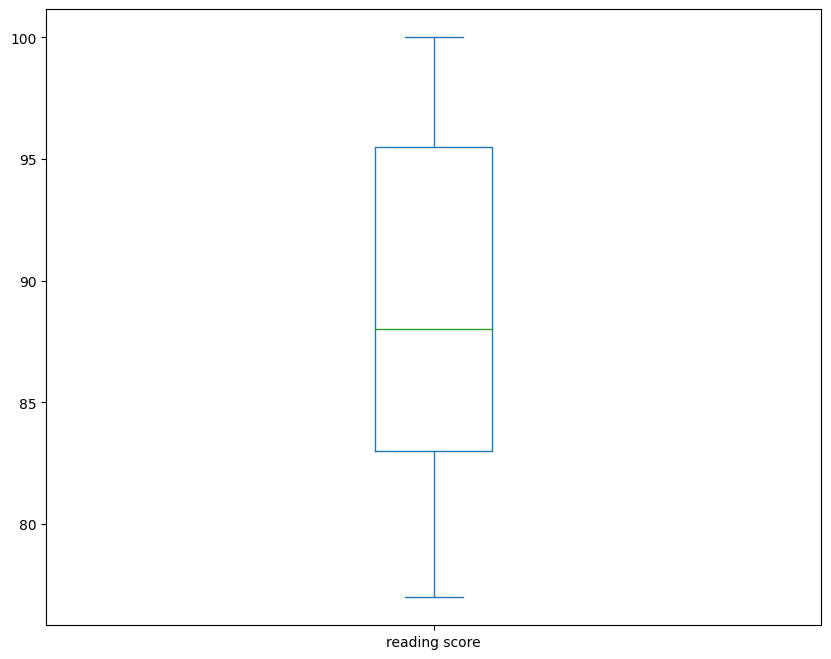

In [ ]:
student_all["reading score"].plot.box(figsize=(10,8))
plt.show()

In [ ]:
# Menghitung skor total
student_all['total_score'] = student_all['math score'] + student_all['reading score'] + student_all['writing score']

# Mengurutkan DataFrame berdasarkan skor total secara menurun
score_all = student_all.sort_values(by='total_score', ascending=False)

# Mengambil 3 baris pertama dari DataFrame yang telah diurutkan
top3_students = score_all.head(3)

# Menampilkan top 3 student
print(top3_students[['student_id', 'total_score']])

    student_id  total_score
45    56712636          300
3     99131099          299
30    84000392          296


In [ ]:
print(top3_students)

    gender race/ethnicity parental level of education     lunch  \
45    male        group E           bachelor's degree  standard   
3   female        group E           bachelor's degree  standard   
30    male        group D                some college  standard   

   test preparation course  math score  reading score  writing score  \
45               completed         100            100            100   
3                completed          99            100            100   
30               completed         100             97             99   

                              university  student_id  total_score  
45                     Monash University    56712636          300  
3                 University of Oklahoma    99131099          299  
30  Karaganda State Technical University    84000392          296  


In [ ]:
top3_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id,total_score
45,male,group E,bachelor's degree,standard,completed,100,100,100,Monash University,56712636,300
3,female,group E,bachelor's degree,standard,completed,99,100,100,University of Oklahoma,99131099,299
30,male,group D,some college,standard,completed,100,97,99,Karaganda State Technical University,84000392,296


In [ ]:
# Menghitung jumlah siswa di setiap universitas
university_counts = student_all['university'].value_counts()

# Mengurutkan hasil perhitungan secara menurun
sorted_universities = university_counts.sort_values(ascending=False)

# Mengambil 3 baris pertama dari hasil perhitungan
top3_universities = sorted_universities.head(3)

# Menampilkan top 3 universitas
print(top3_universities)


Universidad Nacional Autónoma de México (UNAM)    2
Manipal Academy of Higher Education               2
Universidad Nacional de Córdoba                   1
Name: university, dtype: int64


In [ ]:
top3_universities

Universidad Nacional Autónoma de México (UNAM)    2
Manipal Academy of Higher Education               2
Universidad Nacional de Córdoba                   1
Name: university, dtype: int64

# University 


In [ ]:
Univ_1 = pd.read_csv('/content/Univ/2018-University-Rankings.csv')
Univ_1

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,701+,UTAH STATE UNIVERSITY,United States,L,CO,VH,5,A,-,...,-,-,-,-,-,-,-,-,-,-
891,801-1000,701+,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,-,...,-,-,-,-,-,-,-,-,-,-
892,801-1000,701+,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,4,A,-,...,-,-,-,-,-,-,-,-,-,-
893,801-1000,701+,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
Univ_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank_2018                    895 non-null    object
 1   rank_2017                    895 non-null    object
 2   institution                  895 non-null    object
 3   country                      895 non-null    object
 4   classification               895 non-null    object
 5   focus                        895 non-null    object
 6   research_intensity           895 non-null    object
 7   age                          895 non-null    int64 
 8   status                       895 non-null    object
 9   academic_reputation_score    895 non-null    object
 10  academic_reputation_rank     895 non-null    object
 11  employer_reputation_score    895 non-null    object
 12  employer_reputation_rank     895 non-null    object
 13  faculty_student_score        895 no

In [ ]:
Univ_1['rank_2018'].apply(type).value_counts()

<class 'str'>    895
Name: rank_2018, dtype: int64

In [ ]:
Univ_1['rank_2018'] = Univ_1['rank_2018'].str.replace('[^0-9]', '')
Univ_1['rank_2018'] = Univ_1['rank_2018'].astype(int)

In [ ]:
Univ_1['rank_2017'] = Univ_1['rank_2017'].str.replace('[^0-9]', '')
Univ_1['rank_2017'] = Univ_1['rank_2017'].astype(int)

In [ ]:
Univ_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank_2018                    895 non-null    int64 
 1   rank_2017                    895 non-null    int64 
 2   institution                  895 non-null    object
 3   country                      895 non-null    object
 4   classification               895 non-null    object
 5   focus                        895 non-null    object
 6   research_intensity           895 non-null    object
 7   age                          895 non-null    int64 
 8   status                       895 non-null    object
 9   academic_reputation_score    895 non-null    object
 10  academic_reputation_rank     895 non-null    object
 11  employer_reputation_score    895 non-null    object
 12  employer_reputation_rank     895 non-null    object
 13  faculty_student_score        895 no

In [ ]:
Univ_1.head(25)

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6
5,6,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100,...,2,100,6,76.3,81,98.6,68,98.5,50,95.3
6,7,7,UCL (UNIVERSITY COLLEGE LONDON),United Kingdom,XL,FC,VH,5,A,99.7,...,18,99.1,35,74.7,88,96.6,102,100,20,94.6
7,8,9,IMPERIAL COLLEGE LONDON,United Kingdom,L,FC,VH,5,A,99.4,...,8,100,18,68.7,117,100,42,100,12,93.7
8,9,10,UNIVERSITY OF CHICAGO,United States,L,FC,VH,5,B,99.9,...,55,96.5,52,85.9,48,71.9,218,79.8,149,93.5
9,10,8,ETH ZURICH (SWISS FEDERAL INSTITUTE OF TECHNOL...,Switzerland,L,CO,VH,5,A,99.6,...,23,68.2,178,98.7,17,100,14,98.8,47,93.3


In [ ]:
Univ_1['citations_rank'] = Univ_1['citations_rank'].replace('-', np.nan)
Univ_1['international_faculty_rank'] = Univ_1['international_faculty_rank'].replace('-', np.nan)
Univ_1['faculty_student_rank'] = Univ_1['faculty_student_rank'].replace('-', np.nan)
Univ_1['employer_reputation_rank'] = Univ_1['employer_reputation_rank'].replace('-', np.nan)
Univ_1['academic_reputation_rank'] = Univ_1['academic_reputation_rank'].replace('-', np.nan)

Univ_1['citations_rank'] = Univ_1['citations_rank'].replace('401+', np.nan)
Univ_1['international_faculty_rank'] = Univ_1['international_faculty_rank'].replace('401+', np.nan)
Univ_1['faculty_student_rank'] = Univ_1['faculty_student_rank'].replace('401+', np.nan)
Univ_1['employer_reputation_rank'] = Univ_1['employer_reputation_rank'].replace('401+', np.nan)
Univ_1['academic_reputation_rank'] = Univ_1['academic_reputation_rank'].replace('401+', np.nan)

Univ_1['citations_rank'] = Univ_1['citations_rank'].fillna(0).astype(int)
Univ_1['international_faculty_rank'] = Univ_1['international_faculty_rank'].fillna(0).astype(int)
Univ_1['faculty_student_rank'] = Univ_1['faculty_student_rank'].fillna(0).astype(int)
Univ_1['employer_reputation_rank'] = Univ_1['employer_reputation_rank'].fillna(0).astype(int)
Univ_1['academic_reputation_rank'] = Univ_1['academic_reputation_rank'].fillna(0).astype(int)

In [ ]:
Univ_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank_2018                    895 non-null    int64 
 1   rank_2017                    895 non-null    int64 
 2   institution                  895 non-null    object
 3   country                      895 non-null    object
 4   classification               895 non-null    object
 5   focus                        895 non-null    object
 6   research_intensity           895 non-null    object
 7   age                          895 non-null    int64 
 8   status                       895 non-null    object
 9   academic_reputation_score    895 non-null    object
 10  academic_reputation_rank     895 non-null    int64 
 11  employer_reputation_score    895 non-null    object
 12  employer_reputation_rank     895 non-null    int64 
 13  faculty_student_score        895 no

In [ ]:
Univ_1


,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,8011000,701,UTAH STATE UNIVERSITY,United States,L,CO,VH,5,A,-,...,0,-,0,-,0,-,0,-,-,-
891,8011000,701,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,-,...,0,-,0,-,0,-,0,-,-,-
892,8011000,701,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,4,A,-,...,0,-,0,-,0,-,0,-,-,-
893,8011000,701,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,-,...,0,-,0,-,0,-,0,-,-,-


In [ ]:
Univ_1['overall_score'] = Univ_1['overall_score'].replace('-', '0').astype(float)
Univ_1['international_student_score'] = Univ_1['international_student_score'].replace('-', '0').astype(float)
Univ_1['international_faculty_score'] = Univ_1['international_faculty_score'].replace('-', '0').astype(float)
Univ_1['citations_score'] = Univ_1['citations_score'].replace('-', '0').astype(float)
Univ_1['faculty_student_score'] = Univ_1['faculty_student_score'].replace('-', '0').astype(float)
Univ_1['employer_reputation_score'] = Univ_1['employer_reputation_score'].replace('-', '0').astype(float)
Univ_1['academic_reputation_score'] = Univ_1['academic_reputation_score'].replace('-', '0').astype(float)

In [ ]:
Univ_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2018                    895 non-null    int64  
 1   rank_2017                    895 non-null    int64  
 2   institution                  895 non-null    object 
 3   country                      895 non-null    object 
 4   classification               895 non-null    object 
 5   focus                        895 non-null    object 
 6   research_intensity           895 non-null    object 
 7   age                          895 non-null    int64  
 8   status                       895 non-null    object 
 9   academic_reputation_score    895 non-null    float64
 10  academic_reputation_rank     895 non-null    int64  
 11  employer_reputation_score    895 non-null    float64
 12  employer_reputation_rank     895 non-null    int64  
 13  faculty_student_scor

In [ ]:
Univ_1.head(25)

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100.0,...,4,100.0,14,99.9,8,100.0,36,96.1,70,100.0
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100.0,...,5,100.0,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100.0,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100.0,3,100.0,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100.0,...,1,100.0,10,78.3,75,97.4,87,97.7,57,95.6
5,6,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100.0,...,2,100.0,6,76.3,81,98.6,68,98.5,50,95.3
6,7,7,UCL (UNIVERSITY COLLEGE LONDON),United Kingdom,XL,FC,VH,5,A,99.7,...,18,99.1,35,74.7,88,96.6,102,100.0,20,94.6
7,8,9,IMPERIAL COLLEGE LONDON,United Kingdom,L,FC,VH,5,A,99.4,...,8,100.0,18,68.7,117,100.0,42,100.0,12,93.7
8,9,10,UNIVERSITY OF CHICAGO,United States,L,FC,VH,5,B,99.9,...,55,96.5,52,85.9,48,71.9,218,79.8,149,93.5
9,10,8,ETH ZURICH (SWISS FEDERAL INSTITUTE OF TECHNOL...,Switzerland,L,CO,VH,5,A,99.6,...,23,68.2,178,98.7,17,100.0,14,98.8,47,93.3


In [ ]:
Univ_1.tail(20)

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
875,8011000,701,UNIVERSITY OF KARACHI,Pakistan,L,CO,HI,4,A,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0
876,8011000,701,UNIVERSITY OF LAHORE,Pakistan,L,FO,MD,2,B,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0
877,8011000,701,UNIVERSITY OF MARIBOR,Slovenia,L,FC,HI,3,A,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0
878,8011000,601650,UNIVERSITY OF MISSISSIPPI,United States,L,CO,VH,5,A,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0
879,8011000,701,UNIVERSITY OF MUMBAI,India,XL,FC,MD,5,A,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0
880,8011000,701,UNIVERSITY OF NAIROBI,Kenya,XL,FC,MD,3,A,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0
881,8011000,701,UNIVERSITY OF NEW ENGLAND,Australia,L,CO,HI,5,A,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0
882,8011000,701,UNIVERSITY OF PUNE,India,M,CO,HI,4,A,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0
883,8011000,701,UNIVERSITY OF SAN DIEGO,United States,M,CO,HI,4,B,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0
884,8011000,701,UNIVERSITY OF SAN FRANCISCO,United States,M,CO,HI,5,B,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0


In [ ]:
Univ_1.loc[Univ_1['institution'] == 'MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)', 'institution'] = 'MASSACHUSETTS INSTITUTE OF TECHNOLOGY'

In [ ]:
Univ_1['institution'] = Univ_1['institution'].str.replace(' (MIT)', '')

In [ ]:
Univ_1

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100.0,...,4,100.0,14,99.9,8,100.0,36,96.1,70,100.0
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100.0,...,5,100.0,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100.0,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100.0,3,100.0,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100.0,...,1,100.0,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,8011000,701,UTAH STATE UNIVERSITY,United States,L,CO,VH,5,A,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0
891,8011000,701,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0
892,8011000,701,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,4,A,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0
893,8011000,701,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,-,0.0


In [ ]:
Univ_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2018                    895 non-null    int64  
 1   rank_2017                    895 non-null    int64  
 2   institution                  895 non-null    object 
 3   country                      895 non-null    object 
 4   classification               895 non-null    object 
 5   focus                        895 non-null    object 
 6   research_intensity           895 non-null    object 
 7   age                          895 non-null    int64  
 8   status                       895 non-null    object 
 9   academic_reputation_score    895 non-null    float64
 10  academic_reputation_rank     895 non-null    int64  
 11  employer_reputation_score    895 non-null    float64
 12  employer_reputation_rank     895 non-null    int64  
 13  faculty_student_scor

In [ ]:
Univ_1.isna().sum()

rank_2018                      0
rank_2017                      0
institution                    0
country                        0
classification                 0
focus                          0
research_intensity             0
age                            0
status                         0
academic_reputation_score      0
academic_reputation_rank       0
employer_reputation_score      0
employer_reputation_rank       0
faculty_student_score          0
faculty_student_rank           0
citations_score                0
citations_rank                 0
international_faculty_score    0
international_faculty_rank     0
international_student_score    0
international_student_rank     0
overall_score                  0
dtype: int64

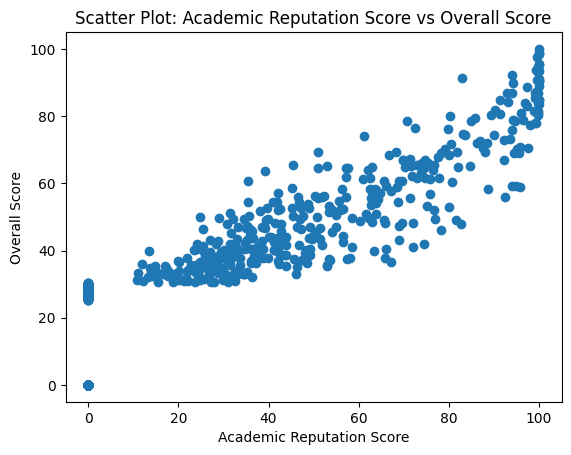

In [ ]:
# Menyiapkan data
x = Univ_1['academic_reputation_score']
y = Univ_1['overall_score']

# Membuat scatter plot
plt.scatter(x, y)

# Memberikan judul dan label sumbu
plt.title('Scatter Plot: Academic Reputation Score vs Overall Score')
plt.xlabel('Academic Reputation Score')
plt.ylabel('Overall Score')

# Menampilkan plot
plt.show()

In [ ]:
Univ_1.corr()

,rank_2018,rank_2017,age,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,overall_score
rank_2018,1.000000,-0.200417,-0.085469,-0.385549,-0.308829,-0.384311,-0.289783,-0.396811,-0.270123,-0.403047,-0.290507,-0.383266,-0.284078,-0.383326,-0.473986
rank_2017,-0.200417,1.000000,-0.127695,-0.496603,-0.397414,-0.491981,-0.376078,-0.336106,-0.221204,-0.417648,-0.269788,-0.372271,-0.247691,-0.372246,-0.466354
age,-0.085469,-0.127695,1.000000,0.262433,0.082305,0.238303,0.088025,0.126040,0.022699,0.204390,0.190435,0.084889,0.102836,0.127922,0.232388
academic_reputation_score,-0.385549,-0.496603,0.262433,1.000000,0.425776,0.923545,0.481603,0.608000,0.385815,0.740077,0.397402,0.616535,0.411710,0.616029,0.922560
academic_reputation_rank,-0.308829,-0.397414,0.082305,0.425776,1.000000,0.468939,0.648441,0.383862,0.319948,0.409500,0.329469,0.441364,0.356372,0.379835,0.457293
employer_reputation_score,-0.384311,-0.491981,0.238303,0.923545,0.468939,1.000000,0.478444,0.594421,0.373635,0.689782,0.393638,0.643864,0.405709,0.652720,0.886013
employer_reputation_rank,-0.289783,-0.376078,0.088025,0.481603,0.648441,0.478444,1.000000,0.344153,0.298690,0.418387,0.332019,0.427186,0.348062,0.367732,0.477031
faculty_student_score,-0.396811,-0.336106,0.126040,0.608000,0.383862,0.594421,0.344153,1.000000,0.493072,0.487988,0.296348,0.508399,0.389304,0.551495,0.769841
faculty_student_rank,-0.270123,-0.221204,0.022699,0.385815,0.319948,0.373635,0.298690,0.493072,1.000000,0.350296,0.216981,0.393735,0.337831,0.371349,0.471658
citations_score,-0.403047,-0.417648,0.204390,0.740077,0.409500,0.689782,0.418387,0.487988,0.350296,1.000000,0.489790,0.670968,0.439182,0.635090,0.843577


In [ ]:
Univ_2 = pd.read_csv('/content/Univ/2019-University-Rankings.csv')

In [ ]:
Univ_2

,rank_2019,rank_2018,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score,Unnamed: 22,Unnamed: 23
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,17,99.8,8,100,41,95.5,77,100,NaN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,16,99,13,99.8,56,70.5,190,98.6,NaN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,40,99.8,9,92.1,151,75.7,164,98.5,NaN,NaN
3,4,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,98.7,...,4,100,5,96.8,115,90.3,103,97.2,NaN,NaN
4,5,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100,...,7,83,56,99.6,63,98.8,43,96.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,801-1000,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,-,...,-,26.4,465,-,-,-,-,7.2 - 14.2,NaN,NaN
891,801-1000,801-1000,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,5,A,-,...,383,-,-,-,-,18.1,547,7.2 - 14.2,NaN,NaN
892,801-1000,801-1000,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,-,...,-,-,-,28.1,464,-,-,7.2 - 14.2,NaN,NaN
893,801-1000,801-1000,WEST UNIVERSITY OF TIMISOARA,Romania,L,FO,HI,4,A,-,...,-,-,-,-,-,-,-,7.2 - 14.2,NaN,NaN


In [ ]:
Univ_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2019                    895 non-null    object 
 1   rank_2018                    895 non-null    object 
 2   institution                  895 non-null    object 
 3   country                      895 non-null    object 
 4   classification               895 non-null    object 
 5   focus                        895 non-null    object 
 6   research_intensity           895 non-null    object 
 7   age                          895 non-null    int64  
 8   status                       895 non-null    object 
 9   academic_reputation_score    895 non-null    object 
 10  academic_reputation_rank     895 non-null    object 
 11  employer_reputation_score    895 non-null    object 
 12  employer_reputation_rank     895 non-null    object 
 13  faculty_student_scor

In [ ]:
Univ_2.drop([ 'country', 'classification', 'focus', 'research_intensity', 'age'], axis=1, inplace=True)

In [ ]:
Univ_2

,rank_2019,rank_2018,institution,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score,Unnamed: 22,Unnamed: 23
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),B,100,3,100,4,100,17,99.8,8,100,41,95.5,77,100,NaN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)
1,2,2,STANFORD UNIVERSITY,B,100,5,100,5,100,16,99,13,99.8,56,70.5,190,98.6,NaN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)
2,3,3,HARVARD UNIVERSITY,B,100,1,100,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5,NaN,NaN
3,4,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),B,98.7,21,81.2,72,100,4,100,5,96.8,115,90.3,103,97.2,NaN,NaN
4,5,6,UNIVERSITY OF OXFORD,A,100,4,100,3,100,7,83,56,99.6,63,98.8,43,96.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,801-1000,VERONA UNIVERSITY,A,-,-,-,-,-,-,26.4,465,-,-,-,-,7.2 - 14.2,NaN,NaN
891,801-1000,801-1000,VORONEZH STATE UNIVERSITY,A,-,-,-,-,40.2,383,-,-,-,-,18.1,547,7.2 - 14.2,NaN,NaN
892,801-1000,801-1000,VYTAUTAS MAGNUS UNIVERSITY,A,-,-,-,-,-,-,-,-,28.1,464,-,-,7.2 - 14.2,NaN,NaN
893,801-1000,801-1000,WEST UNIVERSITY OF TIMISOARA,A,-,-,-,-,-,-,-,-,-,-,-,-,7.2 - 14.2,NaN,NaN


In [ ]:
Univ_2['rank_2019'] = Univ_2['rank_2019'].str.replace('[^0-9]', '')
Univ_2['rank_2019'] = Univ_2['rank_2019'].astype(int)

In [ ]:
Univ_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2019                    895 non-null    int64  
 1   rank_2018                    895 non-null    object 
 2   institution                  895 non-null    object 
 3   status                       895 non-null    object 
 4   academic_reputation_score    895 non-null    object 
 5   academic_reputation_rank     895 non-null    object 
 6   employer_reputation_score    895 non-null    object 
 7   employer_reputation_rank     895 non-null    object 
 8   faculty_student_score        895 non-null    object 
 9   faculty_student_rank         895 non-null    object 
 10  citations_score              895 non-null    object 
 11  citations_rank               895 non-null    object 
 12  international_faculty_score  895 non-null    object 
 13  international_facult

In [ ]:
Univ_2['overall_score'] = Univ_2['overall_score'].replace('-', '0')
Univ_2['overall_score'] = Univ_2['overall_score'].apply(lambda x: float(x.split('-')[0].strip()) if '-' in x else float(x))
Univ_2['international_student_score'] = Univ_2['international_student_score'].replace('-', '0').astype(float)
Univ_2['international_faculty_score'] = Univ_2['international_faculty_score'].replace('-', '0').astype(float)
Univ_2['citations_score'] = Univ_2['citations_score'].replace('-', '0').astype(float)
Univ_2['faculty_student_score'] = Univ_2['faculty_student_score'].replace('-', '0').astype(float)
Univ_2['employer_reputation_score'] = Univ_2['employer_reputation_score'].replace('-', '0').astype(float)
Univ_2['academic_reputation_score'] = Univ_2['academic_reputation_score'].replace('-', '0').astype(float)

In [ ]:
Univ_2

,rank_2019,rank_2018,institution,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score,Unnamed: 22,Unnamed: 23
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),B,100.0,3,100.0,4,100.0,17,99.8,8,100.0,41,95.5,77,100.0,NaN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)
1,2,2,STANFORD UNIVERSITY,B,100.0,5,100.0,5,100.0,16,99.0,13,99.8,56,70.5,190,98.6,NaN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)
2,3,3,HARVARD UNIVERSITY,B,100.0,1,100.0,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5,NaN,NaN
3,4,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),B,98.7,21,81.2,72,100.0,4,100.0,5,96.8,115,90.3,103,97.2,NaN,NaN
4,5,6,UNIVERSITY OF OXFORD,A,100.0,4,100.0,3,100.0,7,83.0,56,99.6,63,98.8,43,96.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,8011000,801-1000,VERONA UNIVERSITY,A,0.0,-,0.0,-,0.0,-,26.4,465,0.0,-,0.0,-,7.2,NaN,NaN
891,8011000,801-1000,VORONEZH STATE UNIVERSITY,A,0.0,-,0.0,-,40.2,383,0.0,-,0.0,-,18.1,547,7.2,NaN,NaN
892,8011000,801-1000,VYTAUTAS MAGNUS UNIVERSITY,A,0.0,-,0.0,-,0.0,-,0.0,-,28.1,464,0.0,-,7.2,NaN,NaN
893,8011000,801-1000,WEST UNIVERSITY OF TIMISOARA,A,0.0,-,0.0,-,0.0,-,0.0,-,0.0,-,0.0,-,7.2,NaN,NaN


In [ ]:
Univ_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2019                    895 non-null    int64  
 1   rank_2018                    895 non-null    object 
 2   institution                  895 non-null    object 
 3   status                       895 non-null    object 
 4   academic_reputation_score    895 non-null    float64
 5   academic_reputation_rank     895 non-null    object 
 6   employer_reputation_score    895 non-null    float64
 7   employer_reputation_rank     895 non-null    object 
 8   faculty_student_score        895 non-null    float64
 9   faculty_student_rank         895 non-null    object 
 10  citations_score              895 non-null    float64
 11  citations_rank               895 non-null    object 
 12  international_faculty_score  895 non-null    float64
 13  international_facult

In [ ]:
Univ_2['citations_rank'] = Univ_2['citations_rank'].replace('\+', '0', regex=True).replace('-', '0').astype(int)
Univ_2['international_faculty_rank'] = Univ_2['international_faculty_rank'].replace('\+', '0', regex=True).replace('-', '0').astype(int)
Univ_2['international_student_rank'] = Univ_2['international_student_rank'].replace('\+', '0', regex=True).replace('-', '0').astype(int)
Univ_2['faculty_student_rank'] = Univ_2['faculty_student_rank'].replace('\+', '0', regex=True).replace('-', '0').astype(int)
Univ_2['employer_reputation_rank'] = Univ_2['employer_reputation_rank'].replace('\+', '0', regex=True).replace('-', '0').astype(int)
Univ_2['academic_reputation_rank'] = Univ_2['academic_reputation_rank'].replace('\+', '0', regex=True).replace('-', '0').astype(int)

In [ ]:
Univ_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2019                    895 non-null    int64  
 1   rank_2018                    895 non-null    object 
 2   institution                  895 non-null    object 
 3   status                       895 non-null    object 
 4   academic_reputation_score    895 non-null    float64
 5   academic_reputation_rank     895 non-null    int64  
 6   employer_reputation_score    895 non-null    float64
 7   employer_reputation_rank     895 non-null    int64  
 8   faculty_student_score        895 non-null    float64
 9   faculty_student_rank         895 non-null    int64  
 10  citations_score              895 non-null    float64
 11  citations_rank               895 non-null    int64  
 12  international_faculty_score  895 non-null    float64
 13  international_facult

In [ ]:
Univ_2.loc[Univ_2['institution'] == 'MASSACHUSETTS INSTITUTE OF TECHNOLOGY', 'institution'] = 'MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)'
Univ_1.loc[Univ_1['institution'] == 'MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)', 'institution'] = 'MASSACHUSETTS INSTITUTE OF TECHNOLOGY'

In [ ]:
Univ_2 = Univ_2.drop('rank_2018', axis=1)
Univ_2 = Univ_2.drop('status', axis=1)

In [ ]:
Univ_2.head(1)

,rank_2019,institution,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score,Unnamed: 22,Unnamed: 23
0,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),100.0,3,100.0,4,100.0,17,99.8,8,100.0,41,95.5,77,100.0,NaN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)


In [ ]:
Univ_1.head(1)

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100.0,...,4,100.0,14,99.9,8,100.0,36,96.1,70,100.0


In [ ]:
gabung_univ = pd.merge(Univ_1, Univ_2, on='institution', suffixes=('_Univ1', '_Univ2'))

In [ ]:
gabung_univ

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score_Univ1,...,faculty_student_rank_Univ2,citations_score_Univ2,citations_rank_Univ2,international_faculty_score_Univ2,international_faculty_rank_Univ2,international_student_score_Univ2,international_student_rank_Univ2,overall_score_Univ2,Unnamed: 22,Unnamed: 23
0,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100.0,...,16,99.0,13,99.8,56,70.5,190,98.6,NaN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)
1,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100.0,...,40,99.8,9,92.1,151,75.7,164,98.5,NaN,NaN
2,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,4,100.0,5,96.8,115,90.3,103,97.2,NaN,NaN
3,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100.0,...,11,77.2,71,99.4,71,97.9,53,95.6,NaN,NaN
4,6,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100.0,...,7,83.0,56,99.6,63,98.8,43,96.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,8011000,701,UNIVERSITY TOULOUSE  JEAN JAURÈS,France,L,FO,HI,5,A,0.0,...,0,0.0,0,37.1,402,53.5,270,7.2,NaN,NaN
769,8011000,701,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,0.0,...,0,26.4,465,0.0,0,0.0,0,7.2,NaN,NaN
770,8011000,701,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,4,A,0.0,...,383,0.0,0,0.0,0,18.1,547,7.2,NaN,NaN
771,8011000,701,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,0.0,...,0,0.0,0,28.1,464,0.0,0,7.2,NaN,NaN


In [ ]:
gabung_univ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 772
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_2018                          773 non-null    int64  
 1   rank_2017                          773 non-null    int64  
 2   institution                        773 non-null    object 
 3   country                            773 non-null    object 
 4   classification                     773 non-null    object 
 5   focus                              773 non-null    object 
 6   research_intensity                 773 non-null    object 
 7   age                                773 non-null    int64  
 8   status                             773 non-null    object 
 9   academic_reputation_score_Univ1    773 non-null    float64
 10  academic_reputation_rank_Univ1     773 non-null    int64  
 11  employer_reputation_score_Univ1    773 non-null    float64

In [ ]:
data = {'rank_2018': [1],
        'rank_2017': [1],
        'institution': ['MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)'],
        'country': ['United States'],
        'classification': ['M'],
        'focus': ['CO'],
        'research_intensity': ['VH'],
        'age': [5],
        'status': ['B'],
        'academic_reputation_score_Univ1': [100.0],
        'academic_reputation_rank_Univ1': [6],
        'employer_reputation_score_Univ1': [100.0],
        'employer_reputation_rank_Univ1': [4],
        'faculty_student_score_Univ1': [100.0],
        'faculty_student_rank_Univ1': [14],
        'citations_score_Univ1': [99.9],
        'citations_rank_Univ1': [8],
        'international_faculty_score_Univ1': [100.0],
        'international_faculty_rank_Univ1': [36],
        'international_student_score_Univ1': [96.1],
        'international_student_rank_Univ1': [70],
        'overall_score_Univ1': [100.0],
        'rank_2019': [1],
        'academic_reputation_score_Univ2': [100],
        'academic_reputation_rank_Univ2': [3],
        'employer_reputation_score_Univ2': [100],
        'employer_reputation_rank_Univ2': [4],
        'faculty_student_score_Univ2': [100],
        'faculty_student_rank_Univ2': [17],
        'citations_score_Univ2': [99.8],
        'citations_rank_Univ2': [8],
        'international_faculty_score_Univ2': [100],
        'international_faculty_rank_Univ2': [41],
        'international_student_score_Univ2': [95.5],
        'international_student_rank_Univ2': [77],
        'overall_score_Univ2': [100]}

new_data = pd.DataFrame(data)
gabung_univ = gabung_univ.append(new_data, ignore_index=True)

In [ ]:
gabung_univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_2018                          774 non-null    int64  
 1   rank_2017                          774 non-null    int64  
 2   institution                        774 non-null    object 
 3   country                            774 non-null    object 
 4   classification                     774 non-null    object 
 5   focus                              774 non-null    object 
 6   research_intensity                 774 non-null    object 
 7   age                                774 non-null    int64  
 8   status                             774 non-null    object 
 9   academic_reputation_score_Univ1    774 non-null    float64
 10  academic_reputation_rank_Univ1     774 non-null    int64  
 11  employer_reputation_score_Univ1    774 non-null    float64

In [ ]:
gabung_univ

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score_Univ1,...,faculty_student_rank_Univ2,citations_score_Univ2,citations_rank_Univ2,international_faculty_score_Univ2,international_faculty_rank_Univ2,international_student_score_Univ2,international_student_rank_Univ2,overall_score_Univ2,Unnamed: 22,Unnamed: 23
0,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100.0,...,16,99.0,13,99.8,56,70.5,190,98.6,NaN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)
1,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100.0,...,40,99.8,9,92.1,151,75.7,164,98.5,NaN,NaN
2,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,4,100.0,5,96.8,115,90.3,103,97.2,NaN,NaN
3,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100.0,...,11,77.2,71,99.4,71,97.9,53,95.6,NaN,NaN
4,6,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100.0,...,7,83.0,56,99.6,63,98.8,43,96.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,8011000,701,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,0.0,...,0,26.4,465,0.0,0,0.0,0,7.2,NaN,NaN
770,8011000,701,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,4,A,0.0,...,383,0.0,0,0.0,0,18.1,547,7.2,NaN,NaN
771,8011000,701,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,0.0,...,0,0.0,0,28.1,464,0.0,0,7.2,NaN,NaN
772,8011000,701,WEST UNIVERSITY OF TIMISOARA,Romania,L,FO,HI,4,A,0.0,...,0,0.0,0,0.0,0,0.0,0,7.2,NaN,NaN


In [ ]:
df_univ = gabung_univ.sort_values(by='rank_2018', ascending=True)

In [ ]:
df_univ

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score_Univ1,...,faculty_student_rank_Univ2,citations_score_Univ2,citations_rank_Univ2,international_faculty_score_Univ2,international_faculty_rank_Univ2,international_student_score_Univ2,international_student_rank_Univ2,overall_score_Univ2,Unnamed: 22,Unnamed: 23
773,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100.0,...,17,99.8,8,100.0,41,95.5,77,100.0,NaN,NaN
0,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100.0,...,16,99.0,13,99.8,56,70.5,190,98.6,NaN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)
1,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100.0,...,40,99.8,9,92.1,151,75.7,164,98.5,NaN,NaN
2,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,4,100.0,5,96.8,115,90.3,103,97.2,NaN,NaN
3,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100.0,...,11,77.2,71,99.4,71,97.9,53,95.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,8011000,701,NOVOSIBIRSK STATE TECHNICAL UNIVERSITY,Russia,L,FO,HI,4,A,0.0,...,0,0.0,0,0.0,0,44.7,317,7.2,NaN,NaN
701,8011000,701,NOTTINGHAM TRENT UNIVERSITY,United Kingdom,L,CO,HI,5,A,0.0,...,0,0.0,0,47.8,338,26.5,458,7.2,NaN,NaN
700,8011000,701,NORTH-WEST UNIVERSITY,South Africa,XL,CO,HI,2,A,0.0,...,0,0.0,0,0.0,0,0.0,0,7.2,NaN,NaN
710,8011000,701,SEPULUH NOPEMBER INSTITUTE OF TECHNOLOGY,Indonesia,L,SP,LO,4,A,0.0,...,0,0.0,0,31.3,442,0.0,0,7.2,NaN,NaN


In [ ]:
print(df_univ.columns)

Index(['rank_2018', 'rank_2017', 'institution', 'country', 'classification',
       'focus', 'research_intensity', 'age', 'status',
       'academic_reputation_score_Univ1', 'academic_reputation_rank_Univ1',
       'employer_reputation_score_Univ1', 'employer_reputation_rank_Univ1',
       'faculty_student_score_Univ1', 'faculty_student_rank_Univ1',
       'citations_score_Univ1', 'citations_rank_Univ1',
       'international_faculty_score_Univ1', 'international_faculty_rank_Univ1',
       'international_student_score_Univ1', 'international_student_rank_Univ1',
       'overall_score_Univ1', 'rank_2019', 'academic_reputation_score_Univ2',
       'academic_reputation_rank_Univ2', 'employer_reputation_score_Univ2',
       'employer_reputation_rank_Univ2', 'faculty_student_score_Univ2',
       'faculty_student_rank_Univ2', 'citations_score_Univ2',
       'citations_rank_Univ2', 'international_faculty_score_Univ2',
       'international_faculty_rank_Univ2', 'international_student_score_Univ

In [ ]:
df_univ['overall_score'] = (df_univ['overall_score_Univ1'] + df_univ['overall_score_Univ2']) / 2
df_univ['academic_reputation_score'] = (df_univ['academic_reputation_score_Univ1'] + df_univ['academic_reputation_score_Univ2']) / 2
df_univ['academic_reputation_rank'] = (df_univ['academic_reputation_rank_Univ1'] + df_univ['academic_reputation_rank_Univ2']) / 2
df_univ['employer_reputation_score_Univ1'] = (df_univ['employer_reputation_score_Univ1'] + df_univ['employer_reputation_score_Univ2']) / 2
df_univ['employer_reputation_rank'] = (df_univ['employer_reputation_rank_Univ1'] + df_univ['employer_reputation_rank_Univ2']) / 2
df_univ['faculty_student_score'] = (df_univ['faculty_student_score_Univ1'] + df_univ['faculty_student_score_Univ2']) / 2
df_univ['faculty_student_rank'] = (df_univ['faculty_student_rank_Univ1'] + df_univ['faculty_student_rank_Univ2']) / 2
df_univ['international_student_score'] = (df_univ['international_student_score_Univ1'] + df_univ['international_student_score_Univ2']) / 2
df_univ['international_faculty_rank'] = (df_univ['international_faculty_rank_Univ1'] + df_univ['international_faculty_rank_Univ2']) / 2
df_univ['faculty_student_rank'] = (df_univ['faculty_student_rank_Univ1'] + df_univ['faculty_student_rank_Univ2']) / 2
df_univ['faculty_student_rank'] = (df_univ['faculty_student_rank_Univ1'] + df_univ['faculty_student_rank_Univ2']) / 2
df_univ['faculty_student_rank'] = (df_univ['faculty_student_rank_Univ1'] + df_univ['faculty_student_rank_Univ2']) / 2

In [ ]:
df_univ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 773 to 772
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_2018                          774 non-null    int64  
 1   rank_2017                          774 non-null    int64  
 2   institution                        774 non-null    object 
 3   country                            774 non-null    object 
 4   classification                     774 non-null    object 
 5   focus                              774 non-null    object 
 6   research_intensity                 774 non-null    object 
 7   age                                774 non-null    int64  
 8   status                             774 non-null    object 
 9   academic_reputation_score_Univ1    774 non-null    float64
 10  academic_reputation_rank_Univ1     774 non-null    int64  
 11  employer_reputation_score_Univ1    774 non-null    float

In [ ]:
columns_to_drop = [
    'academic_reputation_score_Univ1', 'academic_reputation_rank_Univ1',
    'employer_reputation_score_Univ1', 'employer_reputation_rank_Univ1',
    'faculty_student_score_Univ1', 'faculty_student_rank_Univ1',
    'citations_score_Univ1', 'citations_rank_Univ1',
    'international_faculty_score_Univ1', 'international_faculty_rank_Univ1',
    'international_student_score_Univ1', 'international_student_rank_Univ1',
    'academic_reputation_score_Univ2', 'academic_reputation_rank_Univ2',
    'employer_reputation_score_Univ2', 'employer_reputation_rank_Univ2',
    'faculty_student_score_Univ2', 'faculty_student_rank_Univ2',
    'citations_score_Univ2', 'citations_rank_Univ2',
    'international_faculty_score_Univ2', 'international_faculty_rank_Univ2',
    'international_student_score_Univ2', 'international_student_rank_Univ2'
]

df_univ = df_univ.drop(columns=columns_to_drop)

In [ ]:
columns_to_drop = ['overall_score_Univ1', 'overall_score_Univ2']
df_univ = df_univ.drop(columns=columns_to_drop)

In [ ]:
columns_to_convert = ['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'international_faculty_rank']
df_univ[columns_to_convert] = df_univ[columns_to_convert].astype(int)

In [ ]:
df_univ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 773 to 772
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2018                    774 non-null    int64  
 1   rank_2017                    774 non-null    int64  
 2   institution                  774 non-null    object 
 3   country                      774 non-null    object 
 4   classification               774 non-null    object 
 5   focus                        774 non-null    object 
 6   research_intensity           774 non-null    object 
 7   age                          774 non-null    int64  
 8   status                       774 non-null    object 
 9   rank_2019                    774 non-null    int64  
 10  Unnamed: 22                  0 non-null      float64
 11  Unnamed: 23                  1 non-null      object 
 12  overall_score                774 non-null    float64
 13  academic_reputatio

In [ ]:
df_univ

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,Unnamed: 22,Unnamed: 23,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank
773,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,1,NaN,NaN,100.00,100.0,4,4,100.0,15,95.80,38
0,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,2,NaN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),98.65,100.0,5,5,100.0,14,71.60,55
1,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,3,NaN,NaN,98.45,100.0,1,2,98.8,39,75.45,127
2,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,4,NaN,NaN,97.45,99.1,21,74,100.0,3,89.75,120
3,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,6,NaN,NaN,95.60,100.0,2,1,100.0,10,97.80,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,8011000,701,NOVOSIBIRSK STATE TECHNICAL UNIVERSITY,Russia,L,FO,HI,4,A,8011000,NaN,NaN,3.60,0.0,0,0,0.0,0,22.35,0
701,8011000,701,NOTTINGHAM TRENT UNIVERSITY,United Kingdom,L,CO,HI,5,A,8011000,NaN,NaN,3.60,0.0,0,159,0.0,0,13.25,169
700,8011000,701,NORTH-WEST UNIVERSITY,South Africa,XL,CO,HI,2,A,8011000,NaN,NaN,3.60,0.0,0,0,0.0,0,0.00,0
710,8011000,701,SEPULUH NOPEMBER INSTITUTE OF TECHNOLOGY,Indonesia,L,SP,LO,4,A,8011000,NaN,NaN,3.60,0.0,0,0,0.0,0,0.00,221


In [ ]:
Univ_3 = pd.read_csv('/content/Univ/2021-2022-University-Rankings.csv')
# merged_df = df_univ.merge(Univ_3, on='institution', suffixes=('_Univ1', '_Univ3'))

In [ ]:
Univ_3

,rank_2022,rank_2021,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,801-1000,801-1000,"Vietnam National University, Hanoi",Vietnam,XL,FO,HI,3,A,-,...,-,-,-,-,-,-,-,-,-,9 - 14.1
884,801-1000,801-1000,Voronezh State University,Russia,L,CO,HI,5,A,-,...,-,37.3,420,-,-,-,-,16.3,580,9 - 14.1
885,801-1000,801-1000,Vytautas Magnus University,Lithuania,M,FO,VH,4,A,-,...,-,-,-,-,-,17.4,583,-,-,9 - 14.1
886,801-1000,801-1000,Wroc?aw University of Science and Technology,Poland,L,FO,VH,5,A,-,...,-,26.3,564,-,-,-,-,-,-,9 - 14.1


In [ ]:
Univ_3['institution'] = Univ_3['institution'].str.upper()

In [ ]:
Univ_3['rank_2021'] = Univ_3['rank_2021'].str.replace('[^0-9]', '')
Univ_3['rank_2021'] = Univ_3['rank_2021'].astype(int)

In [ ]:
Univ_3['rank_2022'] = Univ_3['rank_2022'].str.replace('[^0-9]', '')
Univ_3['rank_2022'] = Univ_3['rank_2022'].astype(int)

In [ ]:
Univ_3['citations_rank'] = Univ_3['citations_rank'].replace('-', np.nan)
Univ_3['international_faculty_rank'] = Univ_3['international_faculty_rank'].replace('-', np.nan)
Univ_3['faculty_student_rank'] = Univ_3['faculty_student_rank'].replace('-', np.nan)
Univ_3['employer_reputation_rank'] = Univ_3['employer_reputation_rank'].replace('-', np.nan)
Univ_3['academic_reputation_rank'] = Univ_3['academic_reputation_rank'].replace('-', np.nan)

Univ_3['citations_rank'] = Univ_3['citations_rank'].replace('401+', np.nan)
Univ_3['international_faculty_rank'] = Univ_3['international_faculty_rank'].replace('401+', np.nan)
Univ_3['faculty_student_rank'] = Univ_3['faculty_student_rank'].replace('401+', np.nan)
Univ_3['employer_reputation_rank'] = Univ_3['employer_reputation_rank'].replace('401+', np.nan)
Univ_3['academic_reputation_rank'] = Univ_3['academic_reputation_rank'].replace('401+', np.nan)

In [ ]:
Univ_3['citations_rank'] = Univ_3['citations_rank'].replace(['601+', '501+'], 0)
Univ_3['international_faculty_rank'] = Univ_3['international_faculty_rank'].replace(['601+', '501+'], 0)
Univ_3['faculty_student_rank'] = Univ_3['faculty_student_rank'].replace(['601+', '501+'], 0)
Univ_3['employer_reputation_rank'] = Univ_3['employer_reputation_rank'].replace(['601+', '501+'], 0)
Univ_3['academic_reputation_rank'] = Univ_3['academic_reputation_rank'].replace(['601+', '501+'], 0)

Univ_3['citations_rank'] = Univ_3['citations_rank'].fillna(0).astype(int)
Univ_3['international_faculty_rank'] = Univ_3['international_faculty_rank'].fillna(0).astype(int)
Univ_3['faculty_student_rank'] = Univ_3['faculty_student_rank'].fillna(0).astype(int)
Univ_3['employer_reputation_rank'] = Univ_3['employer_reputation_rank'].fillna(0).astype(int)
Univ_3['academic_reputation_rank'] = Univ_3['academic_reputation_rank'].fillna(0).astype(int)

In [ ]:
Univ_3

,rank_2022,rank_2021,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,8011000,8011000,"VIETNAM NATIONAL UNIVERSITY, HANOI",Vietnam,XL,FO,HI,3,A,-,...,0,-,0,-,0,-,0,-,-,9 - 14.1
884,8011000,8011000,VORONEZH STATE UNIVERSITY,Russia,L,CO,HI,5,A,-,...,0,37.3,420,-,0,-,0,16.3,580,9 - 14.1
885,8011000,8011000,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,VH,4,A,-,...,0,-,0,-,0,17.4,583,-,-,9 - 14.1
886,8011000,8011000,WROC?AW UNIVERSITY OF SCIENCE AND TECHNOLOGY,Poland,L,FO,VH,5,A,-,...,0,26.3,564,-,0,-,0,-,-,9 - 14.1


In [ ]:
Univ_3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank_2022                    888 non-null    int64 
 1   rank_2021                    888 non-null    int64 
 2   institution                  888 non-null    object
 3   country                      888 non-null    object
 4   classification               888 non-null    object
 5   focus                        888 non-null    object
 6   research_intensity           888 non-null    object
 7   age                          888 non-null    int64 
 8   status                       888 non-null    object
 9   academic_reputation_score    888 non-null    object
 10  academic_reputation_rank     888 non-null    int64 
 11  employer_reputation_score    888 non-null    object
 12  employer_reputation_rank     888 non-null    int64 
 13  faculty_student_score        888 no

In [ ]:
Univ_3 = Univ_3.drop(['country', 'classification', 'focus', 'research_intensity', 'status'], axis=1)

In [ ]:
Univ_3 = Univ_3.drop('age', axis=1)

In [ ]:
def calculate_average_score(score_range):
    if '-' in score_range:
        min_score, max_score = score_range.split('-')
        return (float(min_score) + float(max_score)) / 2
    else:
        return float(score_range)

Univ_3['academic_reputation_score'] = Univ_3['academic_reputation_score'].replace('-', np.nan).astype(float)
Univ_3['employer_reputation_score'] = Univ_3['employer_reputation_score'].replace('-', np.nan).astype(float)
Univ_3['faculty_student_score'] = Univ_3['faculty_student_score'].replace('-', np.nan).astype(float)
Univ_3['citations_score'] = Univ_3['citations_score'].replace('-', np.nan).astype(float)
Univ_3['international_faculty_score'] = Univ_3['international_faculty_score'].replace('-', np.nan).astype(float)
Univ_3['international_student_score'] = Univ_3['international_student_score'].replace('-', np.nan).astype(float)
Univ_3['overall_score'] = Univ_3['overall_score'].replace('-', np.nan).apply(calculate_average_score).astype(float)

Univ_3 = Univ_3.fillna(0)

In [ ]:
Univ_3

,rank_2022,rank_2021,institution,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),100.0,5,100.0,4,100.0,15,99.8,7,100.0,43,94.1,87,100.00
1,2,2,STANFORD UNIVERSITY,100.0,4,100.0,5,100.0,12,98.6,13,99.8,62,67.7,196,98.40
2,3,3,HARVARD UNIVERSITY,100.0,1,100.0,1,98.7,40,99.6,8,86.3,186,62.2,221,97.40
3,4,5,UNIVERSITY OF OXFORD,100.0,3,100.0,3,100.0,8,84.7,45,99.7,64,98.5,50,97.20
4,5,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),97.8,23,81.2,74,100.0,4,100.0,4,99.4,72,87.3,121,96.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,8011000,8011000,"VIETNAM NATIONAL UNIVERSITY, HANOI",0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,-,11.55
884,8011000,8011000,VORONEZH STATE UNIVERSITY,0.0,0,0.0,0,37.3,420,0.0,0,0.0,0,16.3,580,11.55
885,8011000,8011000,VYTAUTAS MAGNUS UNIVERSITY,0.0,0,0.0,0,0.0,0,0.0,0,17.4,583,0.0,-,11.55
886,8011000,8011000,WROC?AW UNIVERSITY OF SCIENCE AND TECHNOLOGY,0.0,0,0.0,0,26.3,564,0.0,0,0.0,0,0.0,-,11.55


In [ ]:
Univ_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2022                    888 non-null    int64  
 1   rank_2021                    888 non-null    int64  
 2   institution                  888 non-null    object 
 3   academic_reputation_score    888 non-null    float64
 4   academic_reputation_rank     888 non-null    int64  
 5   employer_reputation_score    888 non-null    float64
 6   employer_reputation_rank     888 non-null    int64  
 7   faculty_student_score        888 non-null    float64
 8   faculty_student_rank         888 non-null    int64  
 9   citations_score              888 non-null    float64
 10  citations_rank               888 non-null    int64  
 11  international_faculty_score  888 non-null    float64
 12  international_faculty_rank   888 non-null    int64  
 13  international_studen

In [ ]:
df_univ2 = df_univ.merge(Univ_3, on='institution', how='left', suffixes=('_Univ1', '_Univ2'))

In [ ]:
df_univ2

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,employer_reputation_rank_Univ2,faculty_student_score_Univ2,faculty_student_rank_Univ2,citations_score,citations_rank,international_faculty_score,international_faculty_rank_Univ2,international_student_score_Univ2,international_student_rank,overall_score_Univ2
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,1,...,4.0,100.0,15.0,99.8,7.0,100.0,43.0,94.1,87,100.00
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,2,...,5.0,100.0,12.0,98.6,13.0,99.8,62.0,67.7,196,98.40
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,3,...,1.0,98.7,40.0,99.6,8.0,86.3,186.0,62.2,221,97.40
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,4,...,74.0,100.0,4.0,100.0,4.0,99.4,72.0,87.3,121,96.90
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,6,...,2.0,100.0,10.0,74.2,74.0,100.0,58.0,97.6,58,95.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,8011000,701,NOVOSIBIRSK STATE TECHNICAL UNIVERSITY,Russia,L,FO,HI,4,A,8011000,...,0.0,26.5,560.0,0.0,0.0,0.0,0.0,44.8,316,11.55
770,8011000,701,NOTTINGHAM TRENT UNIVERSITY,United Kingdom,L,CO,HI,5,A,8011000,...,368.0,0.0,0.0,0.0,0.0,53.5,318.0,39.0,350,15.90
771,8011000,701,NORTH-WEST UNIVERSITY,South Africa,XL,CO,HI,2,A,8011000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,8011000,701,SEPULUH NOPEMBER INSTITUTE OF TECHNOLOGY,Indonesia,L,SP,LO,4,A,8011000,...,0.0,27.5,544.0,0.0,0.0,42.6,378.0,0.0,-,11.55


In [ ]:
df_univ2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 773
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_2018                          774 non-null    int64  
 1   rank_2017                          774 non-null    int64  
 2   institution                        774 non-null    object 
 3   country                            774 non-null    object 
 4   classification                     774 non-null    object 
 5   focus                              774 non-null    object 
 6   research_intensity                 774 non-null    object 
 7   age                                774 non-null    int64  
 8   status                             774 non-null    object 
 9   rank_2019                          774 non-null    int64  
 10  Unnamed: 22                        0 non-null      float64
 11  Unnamed: 23                        1 non-null      object 

In [ ]:
df_univ2.rename(columns={'employer_reputation_score': 'employer_reputation_score_Univ2'}, inplace=True)

In [ ]:
df_univ2.rename(columns={'international_student_rank': 'international_student_rank_Univ2'}, inplace=True)

In [ ]:
df_univ2.rename(columns={'international_faculty_score': 'international_faculty_score_Univ2'}, inplace=True)

In [ ]:
df_univ2['international_student_rank_Univ2'] = df_univ2['international_student_rank_Univ2'].replace('-', np.nan).replace('601+', np.nan).fillna(0).astype(float)

In [ ]:
df_univ2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 773
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_2018                          774 non-null    int64  
 1   rank_2017                          774 non-null    int64  
 2   institution                        774 non-null    object 
 3   country                            774 non-null    object 
 4   classification                     774 non-null    object 
 5   focus                              774 non-null    object 
 6   research_intensity                 774 non-null    object 
 7   age                                774 non-null    int64  
 8   status                             774 non-null    object 
 9   rank_2019                          774 non-null    int64  
 10  Unnamed: 22                        0 non-null      float64
 11  Unnamed: 23                        1 non-null      object 

In [ ]:
df_univ2['overall_score'] = (df_univ2['overall_score_Univ1'] + df_univ2['overall_score_Univ2']) / 2
df_univ2['academic_reputation_score'] = (df_univ2['academic_reputation_score_Univ1'] + df_univ2['academic_reputation_score_Univ2']) / 2
df_univ2['academic_reputation_rank'] = (df_univ2['academic_reputation_rank_Univ1'] + df_univ2['academic_reputation_rank_Univ2']) / 2
# df_univ2['employer_reputation_score'] = (df_univ2['employer_reputation_score_Univ1'] + df_univ2['employer_reputation_score_Univ2']) / 2
df_univ2['employer_reputation_rank'] = (df_univ2['employer_reputation_rank_Univ1'] + df_univ2['employer_reputation_rank_Univ2']) / 2
df_univ2['faculty_student_score'] = (df_univ2['faculty_student_score_Univ1'] + df_univ2['faculty_student_score_Univ2']) / 2
df_univ2['faculty_student_rank'] = (df_univ2['faculty_student_rank_Univ1'] + df_univ2['faculty_student_rank_Univ2']) / 2
df_univ2['international_student_score'] = (df_univ2['international_student_score_Univ1'] + df_univ2['international_student_score_Univ2']) / 2
df_univ2['international_faculty_rank'] = (df_univ2['international_faculty_rank_Univ1'] + df_univ2['international_faculty_rank_Univ2']) / 2

In [ ]:
df_univ2.drop(['academic_reputation_score_Univ1', 'academic_reputation_rank_Univ1', 'employer_reputation_rank_Univ1', 'faculty_student_score_Univ1', 'faculty_student_rank_Univ1', 'international_student_score_Univ1', 'international_faculty_rank_Univ1', 'academic_reputation_score_Univ2', 'academic_reputation_rank_Univ2',  'employer_reputation_rank_Univ2', 'faculty_student_score_Univ2', 'faculty_student_rank_Univ2', 'citations_score', 'citations_rank', 'international_faculty_score_Univ2', 'international_faculty_rank_Univ2', 'international_student_score_Univ2'], axis=1, inplace=True)

In [ ]:
df_univ2.drop(['international_student_rank_Univ2'], axis=1, inplace=True)

In [ ]:
df_univ2.drop(['overall_score_Univ1', 'overall_score_Univ2'], axis=1, inplace=True)

In [ ]:
df_univ2.rename(columns={'employer_reputation_score_Univ2': 'employer_reputation_score'}, inplace=True)

In [ ]:
df_univ2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 773
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2018                    774 non-null    int64  
 1   rank_2017                    774 non-null    int64  
 2   institution                  774 non-null    object 
 3   country                      774 non-null    object 
 4   classification               774 non-null    object 
 5   focus                        774 non-null    object 
 6   research_intensity           774 non-null    object 
 7   age                          774 non-null    int64  
 8   status                       774 non-null    object 
 9   rank_2019                    774 non-null    int64  
 10  Unnamed: 22                  0 non-null      float64
 11  Unnamed: 23                  1 non-null      object 
 12  rank_2022                    739 non-null    float64
 13  rank_2021           

In [ ]:
print(df_univ2.columns)

Index(['rank_2018', 'rank_2017', 'institution', 'country', 'classification',
       'focus', 'research_intensity', 'age', 'status', 'rank_2019',
       'Unnamed: 22', 'Unnamed: 23', 'rank_2022', 'rank_2021',
       'employer_reputation_score', 'overall_score',
       'academic_reputation_score', 'academic_reputation_rank',
       'employer_reputation_rank', 'faculty_student_score',
       'faculty_student_rank', 'international_student_score',
       'international_faculty_rank'],
      dtype='object')


In [ ]:
df_univ2['academic_reputation_rank'] = df_univ2['academic_reputation_rank'].fillna(0).astype(int)
df_univ2['employer_reputation_rank'] = df_univ2['employer_reputation_rank'].fillna(0).astype(int)
df_univ2['faculty_student_rank'] = df_univ2['faculty_student_rank'].fillna(0).astype(int)
df_univ2['international_faculty_rank'] = df_univ2['international_faculty_rank'].fillna(0).astype(int)


In [ ]:
df_univ2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 773
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2018                    774 non-null    int64  
 1   rank_2017                    774 non-null    int64  
 2   institution                  774 non-null    object 
 3   country                      774 non-null    object 
 4   classification               774 non-null    object 
 5   focus                        774 non-null    object 
 6   research_intensity           774 non-null    object 
 7   age                          774 non-null    int64  
 8   status                       774 non-null    object 
 9   rank_2019                    774 non-null    int64  
 10  Unnamed: 22                  0 non-null      float64
 11  Unnamed: 23                  1 non-null      object 
 12  rank_2022                    739 non-null    float64
 13  rank_2021           

In [ ]:
df_univ2['overall_score'] = df_univ2['overall_score'].fillna(0).astype(int)

In [ ]:
df_univ2

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,rank_2021,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,1,...,1.0,100.0,100,100.00,4,4,100.00,15,94.950,40
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,2,...,2.0,100.0,98,100.00,4,5,100.00,13,69.650,58
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,3,...,3.0,100.0,97,100.00,1,1,98.75,39,68.825,156
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,4,...,4.0,81.2,97,98.45,22,74,100.00,3,88.525,96
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,6,...,6.0,100.0,95,100.00,2,1,100.00,10,97.700,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,8011000,701,NOVOSIBIRSK STATE TECHNICAL UNIVERSITY,Russia,L,FO,HI,4,A,8011000,...,8011000.0,0.0,7,0.00,0,0,13.25,280,33.575,0
770,8011000,701,NOTTINGHAM TRENT UNIVERSITY,United Kingdom,L,CO,HI,5,A,8011000,...,8011000.0,25.8,9,0.00,0,263,0.00,0,26.125,243
771,8011000,701,NORTH-WEST UNIVERSITY,South Africa,XL,CO,HI,2,A,8011000,...,NaN,NaN,0,NaN,0,0,NaN,0,NaN,0
772,8011000,701,SEPULUH NOPEMBER INSTITUTE OF TECHNOLOGY,Indonesia,L,SP,LO,4,A,8011000,...,8011000.0,0.0,7,0.00,0,0,13.75,272,0.000,299


In [ ]:
df_univ2.isna().sum()

rank_2018                        0
rank_2017                        0
institution                      0
country                          0
classification                   0
focus                            0
research_intensity               0
age                              0
status                           0
rank_2019                        0
Unnamed: 22                    774
Unnamed: 23                    773
rank_2022                       35
rank_2021                       35
employer_reputation_score       35
overall_score                    0
academic_reputation_score       35
academic_reputation_rank         0
employer_reputation_rank         0
faculty_student_score           35
faculty_student_rank             0
international_student_score     35
international_faculty_rank       0
dtype: int64

In [ ]:
df_univ2['employer_reputation_score'] = df_univ2['employer_reputation_score'].fillna(0)
df_univ2['academic_reputation_score'] = df_univ2['academic_reputation_score'].fillna(0)
df_univ2['faculty_student_score'] = df_univ2['faculty_student_score'].fillna(0)
df_univ2['international_student_score'] = df_univ2['international_student_score'].fillna(0)

In [ ]:
df_univ2['rank_2021'] = df_univ2['rank_2021'].fillna(0)
df_univ2['rank_2022'] = df_univ2['rank_2022'].fillna(0)

df_univ2['rank_2021'] = df_univ2['rank_2021'].astype(int)
df_univ2['rank_2022'] = df_univ2['rank_2022'].astype(int)

In [ ]:
df_univ2

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,rank_2021,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,1,...,1,100.0,100,100.00,4,4,100.00,15,94.950,40
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,2,...,2,100.0,98,100.00,4,5,100.00,13,69.650,58
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,3,...,3,100.0,97,100.00,1,1,98.75,39,68.825,156
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,4,...,4,81.2,97,98.45,22,74,100.00,3,88.525,96
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,6,...,6,100.0,95,100.00,2,1,100.00,10,97.700,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,8011000,701,NOVOSIBIRSK STATE TECHNICAL UNIVERSITY,Russia,L,FO,HI,4,A,8011000,...,8011000,0.0,7,0.00,0,0,13.25,280,33.575,0
770,8011000,701,NOTTINGHAM TRENT UNIVERSITY,United Kingdom,L,CO,HI,5,A,8011000,...,8011000,25.8,9,0.00,0,263,0.00,0,26.125,243
771,8011000,701,NORTH-WEST UNIVERSITY,South Africa,XL,CO,HI,2,A,8011000,...,0,0.0,0,0.00,0,0,0.00,0,0.000,0
772,8011000,701,SEPULUH NOPEMBER INSTITUTE OF TECHNOLOGY,Indonesia,L,SP,LO,4,A,8011000,...,8011000,0.0,7,0.00,0,0,13.75,272,0.000,299


In [ ]:
df_univ2.isna().sum()

rank_2018                        0
rank_2017                        0
institution                      0
country                          0
classification                   0
focus                            0
research_intensity               0
age                              0
status                           0
rank_2019                        0
Unnamed: 22                    774
Unnamed: 23                    773
rank_2022                        0
rank_2021                        0
employer_reputation_score        0
overall_score                    0
academic_reputation_score        0
academic_reputation_rank         0
employer_reputation_rank         0
faculty_student_score            0
faculty_student_rank             0
international_student_score      0
international_faculty_rank       0
dtype: int64

In [ ]:
column_list = df_univ2.columns.tolist()
print(column_list)

['rank_2018', 'rank_2017', 'institution', 'country', 'classification', 'focus', 'research_intensity', 'age', 'status', 'rank_2019', 'Unnamed: 22', 'Unnamed: 23', 'rank_2022', 'rank_2021', 'employer_reputation_score', 'overall_score', 'academic_reputation_score', 'academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_score', 'faculty_student_rank', 'international_student_score', 'international_faculty_rank']


In [ ]:
df_univ2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 773
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2018                    774 non-null    int64  
 1   rank_2017                    774 non-null    int64  
 2   institution                  774 non-null    object 
 3   country                      774 non-null    object 
 4   classification               774 non-null    object 
 5   focus                        774 non-null    object 
 6   research_intensity           774 non-null    object 
 7   age                          774 non-null    int64  
 8   status                       774 non-null    object 
 9   rank_2019                    774 non-null    int64  
 10  Unnamed: 22                  0 non-null      float64
 11  Unnamed: 23                  1 non-null      object 
 12  rank_2022                    774 non-null    int64  
 13  rank_2021           

In [ ]:
Q1 = df_univ2['rank_2018'].quantile(0.25)
Q3 = df_univ2['rank_2018'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_univ2[(df_univ2['rank_2018'] < lower_bound) | (df_univ2['rank_2018'] > upper_bound)]

In [ ]:
Q1 = df_univ2['rank_2019'].quantile(0.25)
Q3 = df_univ2['rank_2019'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_univ2[(df_univ2['rank_2019'] < lower_bound) | (df_univ2['rank_2019'] > upper_bound)]

In [ ]:
df_univ2['rank_2018'] = df_univ2['rank_2018'].clip(upper=1000)
df_univ2['rank_2017'] = df_univ2['rank_2017'].clip(upper=1000)
df_univ2['rank_2019'] = df_univ2['rank_2019'].clip(upper=1000)
df_univ2['rank_2021'] = df_univ2['rank_2021'].clip(upper=1000)
df_univ2['rank_2022'] = df_univ2['rank_2022'].clip(upper=1000)

In [ ]:
df_univ2

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,rank_2021,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,1,...,1,100.0,100,100.00,4,4,100.00,15,94.950,40
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,2,...,2,100.0,98,100.00,4,5,100.00,13,69.650,58
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,3,...,3,100.0,97,100.00,1,1,98.75,39,68.825,156
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,4,...,4,81.2,97,98.45,22,74,100.00,3,88.525,96
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,6,...,6,100.0,95,100.00,2,1,100.00,10,97.700,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,1000,701,NOVOSIBIRSK STATE TECHNICAL UNIVERSITY,Russia,L,FO,HI,4,A,1000,...,1000,0.0,7,0.00,0,0,13.25,280,33.575,0
770,1000,701,NOTTINGHAM TRENT UNIVERSITY,United Kingdom,L,CO,HI,5,A,1000,...,1000,25.8,9,0.00,0,263,0.00,0,26.125,243
771,1000,701,NORTH-WEST UNIVERSITY,South Africa,XL,CO,HI,2,A,1000,...,0,0.0,0,0.00,0,0,0.00,0,0.000,0
772,1000,701,SEPULUH NOPEMBER INSTITUTE OF TECHNOLOGY,Indonesia,L,SP,LO,4,A,1000,...,1000,0.0,7,0.00,0,0,13.75,272,0.000,299


In [ ]:
univ_4 = pd.read_csv('/content/Univ/2023-University-Rankings.csv')

In [ ]:
univ_4

,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5.0,B,100.0,5,100.0,4,100.0,14,100.0,5,100.0,54,90.0,109,100
1,University of Cambridge,United Kingdom,L,FC,VH,5.0,A,100.0,2,100.0,2,100.0,11,92.3,55,100.0,60,96.3,70,98.8
2,Stanford University,United States,L,FC,VH,5.0,B,100.0,4,100.0,5,100.0,6,99.9,9,99.8,74,60.3,235,98.5
3,University of Oxford,United Kingdom,L,FC,VH,5.0,A,100.0,3,100.0,3,100.0,8,90.0,64,98.8,101,98.4,54,98.4
4,Harvard University,United States,L,FC,VH,5.0,B,100.0,1,100.0,1,99.4,35,100.0,2,76.9,228,66.9,212,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,Universidad Nacional Aut¢noma de Honduras (UNAH),Honduras,XL,FC,LO,5.0,A,4.6,501+,5.8,501+,3.6,601+,1.0,601+,1.7,601+,NaN,NaN,-
1418,Universidad Tecnol¢gica de Bol¡var,Colombia,M,FO,HI,4.0,B,3.0,501+,5.8,501+,2.4,601+,2.2,601+,9.3,601+,1.3,601+,-
1419,Universit Mohammed V de Rabat,Morocco,XL,CO,VH,3.0,A,2.8,501+,2.6,501+,3.2,601+,3.6,601+,5.2,601+,2.8,601+,-
1420,University of Craiova,Romania,L,CO,HI,4.0,A,3.3,501+,1.8,501+,2.7,601+,2.0,601+,NaN,NaN,NaN,NaN,-


In [ ]:
univ_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   institution                  1422 non-null   object 
 1   country                      1422 non-null   object 
 2   classification               1422 non-null   object 
 3   focus                        1421 non-null   object 
 4   research_intensity           1417 non-null   object 
 5   age                          1411 non-null   float64
 6   status                       1418 non-null   object 
 7   academic_reputation_score    1422 non-null   float64
 8   academic_reputation_rank     1422 non-null   object 
 9   employer_reputation_score    1421 non-null   float64
 10  employer_reputation_rank     1422 non-null   object 
 11  faculty_student_score        1420 non-null   float64
 12  faculty_student_rank         1422 non-null   object 
 13  citations_score   

In [ ]:
univ_4 = univ_4.drop(['country', 'classification', 'focus', 'research_intensity', 'age', 'status'], axis=1)

In [ ]:
univ_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   institution                  1422 non-null   object 
 1   academic_reputation_score    1422 non-null   float64
 2   academic_reputation_rank     1422 non-null   object 
 3   employer_reputation_score    1421 non-null   float64
 4   employer_reputation_rank     1422 non-null   object 
 5   faculty_student_score        1420 non-null   float64
 6   faculty_student_rank         1422 non-null   object 
 7   citations_score              1417 non-null   float64
 8   citations_rank               1422 non-null   object 
 9   international_faculty_score  1324 non-null   float64
 10  international_faculty_rank   1324 non-null   object 
 11  international_student_score  1365 non-null   float64
 12  international_student_rank   1365 non-null   object 
 13  overall_score     

In [ ]:
univ_4['academic_reputation_rank'] = pd.to_numeric(univ_4['academic_reputation_rank'], errors='coerce').fillna(0).astype(int)
univ_4['employer_reputation_rank'] = pd.to_numeric(univ_4['employer_reputation_rank'], errors='coerce').fillna(0).astype(int)
univ_4['faculty_student_rank'] = pd.to_numeric(univ_4['faculty_student_rank'], errors='coerce').fillna(0).astype(int)
univ_4['citations_rank'] = pd.to_numeric(univ_4['citations_rank'], errors='coerce').fillna(0).astype(int)
univ_4['international_faculty_rank'] = pd.to_numeric(univ_4['international_faculty_rank'], errors='coerce').fillna(0).astype(int)
univ_4['international_student_rank'] = pd.to_numeric(univ_4['international_student_rank'], errors='coerce').fillna(0).astype(int)
univ_4['overall_score'] = pd.to_numeric(univ_4['overall_score'], errors='coerce').fillna(0).astype(int)

In [ ]:
univ_4

,institution,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,Massachusetts Institute of Technology (MIT),100.0,5,100.0,4,100.0,14,100.0,5,100.0,54,90.0,109,100
1,University of Cambridge,100.0,2,100.0,2,100.0,11,92.3,55,100.0,60,96.3,70,98
2,Stanford University,100.0,4,100.0,5,100.0,6,99.9,9,99.8,74,60.3,235,98
3,University of Oxford,100.0,3,100.0,3,100.0,8,90.0,64,98.8,101,98.4,54,98
4,Harvard University,100.0,1,100.0,1,99.4,35,100.0,2,76.9,228,66.9,212,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,Universidad Nacional Aut¢noma de Honduras (UNAH),4.6,0,5.8,0,3.6,0,1.0,0,1.7,0,NaN,0,0
1418,Universidad Tecnol¢gica de Bol¡var,3.0,0,5.8,0,2.4,0,2.2,0,9.3,0,1.3,0,0
1419,Universit Mohammed V de Rabat,2.8,0,2.6,0,3.2,0,3.6,0,5.2,0,2.8,0,0
1420,University of Craiova,3.3,0,1.8,0,2.7,0,2.0,0,NaN,0,NaN,0,0


In [ ]:
univ_4['employer_reputation_score'] = univ_4['employer_reputation_score'].fillna(0)
univ_4['faculty_student_score'] = univ_4['faculty_student_score'].fillna(0)
univ_4['citations_score'] = univ_4['citations_score'].fillna(0)
univ_4['international_faculty_score'] = univ_4['international_faculty_score'].fillna(0)
univ_4['international_student_score'] = univ_4['international_student_score'].fillna(0)

In [ ]:
univ_4.isna().sum()

institution                    0
academic_reputation_score      0
academic_reputation_rank       0
employer_reputation_score      0
employer_reputation_rank       0
faculty_student_score          0
faculty_student_rank           0
citations_score                0
citations_rank                 0
international_faculty_score    0
international_faculty_rank     0
international_student_score    0
international_student_rank     0
overall_score                  0
dtype: int64

In [ ]:
univ_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   institution                  1422 non-null   object 
 1   academic_reputation_score    1422 non-null   float64
 2   academic_reputation_rank     1422 non-null   int64  
 3   employer_reputation_score    1422 non-null   float64
 4   employer_reputation_rank     1422 non-null   int64  
 5   faculty_student_score        1422 non-null   float64
 6   faculty_student_rank         1422 non-null   int64  
 7   citations_score              1422 non-null   float64
 8   citations_rank               1422 non-null   int64  
 9   international_faculty_score  1422 non-null   float64
 10  international_faculty_rank   1422 non-null   int64  
 11  international_student_score  1422 non-null   float64
 12  international_student_rank   1422 non-null   int64  
 13  overall_score     

In [ ]:
univ_4

,institution,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,Massachusetts Institute of Technology (MIT),100.0,5,100.0,4,100.0,14,100.0,5,100.0,54,90.0,109,100
1,University of Cambridge,100.0,2,100.0,2,100.0,11,92.3,55,100.0,60,96.3,70,98
2,Stanford University,100.0,4,100.0,5,100.0,6,99.9,9,99.8,74,60.3,235,98
3,University of Oxford,100.0,3,100.0,3,100.0,8,90.0,64,98.8,101,98.4,54,98
4,Harvard University,100.0,1,100.0,1,99.4,35,100.0,2,76.9,228,66.9,212,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,Universidad Nacional Aut¢noma de Honduras (UNAH),4.6,0,5.8,0,3.6,0,1.0,0,1.7,0,0.0,0,0
1418,Universidad Tecnol¢gica de Bol¡var,3.0,0,5.8,0,2.4,0,2.2,0,9.3,0,1.3,0,0
1419,Universit Mohammed V de Rabat,2.8,0,2.6,0,3.2,0,3.6,0,5.2,0,2.8,0,0
1420,University of Craiova,3.3,0,1.8,0,2.7,0,2.0,0,0.0,0,0.0,0,0


In [ ]:
print(df_univ2['institution'].value_counts())
print(univ_4['institution'].value_counts())

MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)     1
M.O.AUEZOV SOUTH KAZAKHSTAN STATE UNIVERSITY    1
OSAKA CITY UNIVERSITY                           1
UNIVERSITY OF VERMONT                           1
NAGASAKI UNIVERSITY                             1
                                               ..
UNIVERSITY OF EAST ANGLIA (UEA)                 1
UNIVERSITY OF TURKU                             1
UNIVERSITY OF INDONESIA                         1
UNIVERSITY OF STRATHCLYDE                       1
WEST UNIVERSITY OF TIMISOARA                    1
Name: institution, Length: 774, dtype: int64
Massachusetts Institute of Technology (MIT)     1
University of Messina (UniME)                   1
University of Bari                              1
University of Bahrain                           1
University of Baghdad                           1
                                               ..
University of Cyprus (UCY)                      1
Tulane University                               1
Dubli

In [ ]:
df_univ3 = df_univ2.merge(univ_4, on='institution', how='outer')

In [ ]:
df_univ3

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,employer_reputation_rank_y,faculty_student_score_y,faculty_student_rank_y,citations_score,citations_rank,international_faculty_score,international_faculty_rank_y,international_student_score_y,international_student_rank,overall_score_y
0,1.0,1.0,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5.0,B,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,STANFORD UNIVERSITY,United States,L,FC,VH,5.0,B,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3.0,HARVARD UNIVERSITY,United States,L,FC,VH,5.0,B,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,5.0,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5.0,B,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,4.0,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5.0,A,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,NaN,NaN,Universidad Nacional Aut¢noma de Honduras (UNAH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.6,0.0,1.0,0.0,1.7,0.0,0.0,0.0,0.0
2192,NaN,NaN,Universidad Tecnol¢gica de Bol¡var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,2.4,0.0,2.2,0.0,9.3,0.0,1.3,0.0,0.0
2193,NaN,NaN,Universit Mohammed V de Rabat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.2,0.0,3.6,0.0,5.2,0.0,2.8,0.0,0.0
2194,NaN,NaN,University of Craiova,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,2.7,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_univ3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2196 entries, 0 to 2195
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rank_2018                      774 non-null    float64
 1   rank_2017                      774 non-null    float64
 2   institution                    2196 non-null   object 
 3   country                        774 non-null    object 
 4   classification                 774 non-null    object 
 5   focus                          774 non-null    object 
 6   research_intensity             774 non-null    object 
 7   age                            774 non-null    float64
 8   status                         774 non-null    object 
 9   rank_2019                      774 non-null    float64
 10  Unnamed: 22                    0 non-null      float64
 11  Unnamed: 23                    1 non-null      object 
 12  rank_2022                      774 non-null    f

In [ ]:
df_univ2

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,rank_2021,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,1,...,1,100.0,100,100.00,4,4,100.00,15,94.950,40
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,2,...,2,100.0,98,100.00,4,5,100.00,13,69.650,58
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,3,...,3,100.0,97,100.00,1,1,98.75,39,68.825,156
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,4,...,4,81.2,97,98.45,22,74,100.00,3,88.525,96
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,6,...,6,100.0,95,100.00,2,1,100.00,10,97.700,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,1000,701,NOVOSIBIRSK STATE TECHNICAL UNIVERSITY,Russia,L,FO,HI,4,A,1000,...,1000,0.0,7,0.00,0,0,13.25,280,33.575,0
770,1000,701,NOTTINGHAM TRENT UNIVERSITY,United Kingdom,L,CO,HI,5,A,1000,...,1000,25.8,9,0.00,0,263,0.00,0,26.125,243
771,1000,701,NORTH-WEST UNIVERSITY,South Africa,XL,CO,HI,2,A,1000,...,0,0.0,0,0.00,0,0,0.00,0,0.000,0
772,1000,701,SEPULUH NOPEMBER INSTITUTE OF TECHNOLOGY,Indonesia,L,SP,LO,4,A,1000,...,1000,0.0,7,0.00,0,0,13.75,272,0.000,299


In [ ]:
fix_df = df_univ2.iloc[:675]

In [ ]:
fix_df

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,rank_2021,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,1,...,1,100.0,100,100.00,4,4,100.000,15,94.950,40
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,2,...,2,100.0,98,100.00,4,5,100.000,13,69.650,58
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,3,...,3,100.0,97,100.00,1,1,98.750,39,68.825,156
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,4,...,4,81.2,97,98.45,22,74,100.000,3,88.525,96
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,6,...,6,100.0,95,100.00,2,1,100.000,10,97.700,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,1000,701,KING FAISAL UNIVERSITY,Saudi Arabia,XL,FO,HI,3,A,1000,...,1000,0.0,7,0.00,0,0,0.000,0,0.000,45
671,1000,701,LOYOLA UNIVERSITY CHICAGO,United States,L,FC,HI,5,B,1000,...,1000,0.0,9,0.00,0,0,22.225,382,0.000,0
672,1000,1000,UNIVERSIDAD DE LA SABANA,Colombia,M,FC,MD,3,B,1000,...,1000,44.4,9,0.00,0,168,0.000,0,0.000,0
673,1000,701,GEORGIA STATE UNIVERSITY,United States,L,CO,VH,5,A,1000,...,1000,0.0,11,0.00,0,0,0.000,0,0.000,0


In [ ]:
fix_df[['rank_2018', 'institution']].tail(20)

,rank_2018,institution
655,1000,UNIVERSITÀ DEGLI STUDI DI PERUGIA
656,1000,UNIVERSITY OF HERTFORDSHIRE
657,1000,UNIVERSITÀ DEGLI STUDI DI FERRARA
658,1000,NORTHUMBRIA UNIVERSITY AT NEWCASTLE
659,1000,UNIVERSIDAD DIEGO PORTALES
660,1000,ABU DHABI UNIVERSITY
661,1000,UNIVERSIDADE FEDERAL DE SANTA CATARINA
662,1000,AL-IMAM MOHAMED IBN SAUD ISLAMIC UNIVERSITY
663,1000,BELARUSIAN NATIONAL TECHNICAL UNIVERSITY
664,1000,BRIGHAM YOUNG UNIVERSITY


In [ ]:
fix_df

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,rank_2021,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,1,...,1,100.0,100,100.00,4,4,100.000,15,94.950,40
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,2,...,2,100.0,98,100.00,4,5,100.000,13,69.650,58
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,3,...,3,100.0,97,100.00,1,1,98.750,39,68.825,156
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,4,...,4,81.2,97,98.45,22,74,100.000,3,88.525,96
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,6,...,6,100.0,95,100.00,2,1,100.000,10,97.700,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,1000,701,KING FAISAL UNIVERSITY,Saudi Arabia,XL,FO,HI,3,A,1000,...,1000,0.0,7,0.00,0,0,0.000,0,0.000,45
671,1000,701,LOYOLA UNIVERSITY CHICAGO,United States,L,FC,HI,5,B,1000,...,1000,0.0,9,0.00,0,0,22.225,382,0.000,0
672,1000,1000,UNIVERSIDAD DE LA SABANA,Colombia,M,FC,MD,3,B,1000,...,1000,44.4,9,0.00,0,168,0.000,0,0.000,0
673,1000,701,GEORGIA STATE UNIVERSITY,United States,L,CO,VH,5,A,1000,...,1000,0.0,11,0.00,0,0,0.000,0,0.000,0


In [ ]:
fix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 674
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2018                    675 non-null    int64  
 1   rank_2017                    675 non-null    int64  
 2   institution                  675 non-null    object 
 3   country                      675 non-null    object 
 4   classification               675 non-null    object 
 5   focus                        675 non-null    object 
 6   research_intensity           675 non-null    object 
 7   age                          675 non-null    int64  
 8   status                       675 non-null    object 
 9   rank_2019                    675 non-null    int64  
 10  Unnamed: 22                  0 non-null      float64
 11  Unnamed: 23                  1 non-null      object 
 12  rank_2022                    675 non-null    int64  
 13  rank_2021           

In [ ]:
fix_df = fix_df.iloc[:400]

In [ ]:
# fix_df = fix_df.iloc[:400]

In [ ]:
fix_df

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,rank_2021,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,1,...,1,100.0,100,100.000,4,4,100.000,15,94.950,40
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,2,...,2,100.0,98,100.000,4,5,100.000,13,69.650,58
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,3,...,3,100.0,97,100.000,1,1,98.750,39,68.825,156
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,4,...,4,81.2,97,98.450,22,74,100.000,3,88.525,96
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,6,...,6,100.0,95,100.000,2,1,100.000,10,97.700,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1000,1000,FLORIDA STATE UNIVERSITY,United States,XL,FC,HI,5,A,472,...,472,43.3,26,19.900,237,185,12.000,1502,6.175,1790
396,1000,1000,CONCORDIA UNIVERSITY,Canada,XL,CO,VH,3,A,464,...,464,36.2,26,11.250,1252,192,6.100,1502,88.625,199
397,1000,1000,CHRISTIAN-ALBRECHTS-UNIVERSITÄT ZU KIEL,Germany,L,FC,VH,5,A,453,...,453,4.7,25,13.400,348,1252,55.850,263,13.100,142
398,1000,1000,BOND UNIVERSITY,Australia,S,FC,HI,3,B,443,...,443,8.4,26,2.800,1252,1252,51.175,289,97.575,80


In [ ]:
Q1 = fix_df['rank_2019'].quantile(0.25)
Q3 = fix_df['rank_2019'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
fix_df['rank_2019'] = fix_df['rank_2019'].clip(lower_bound, upper_bound)

In [ ]:
Q1 = fix_df['rank_2018'].quantile(0.25)
Q3 = fix_df['rank_2018'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
fix_df['rank_2018'] = fix_df['rank_2018'].clip(lower_bound, upper_bound)

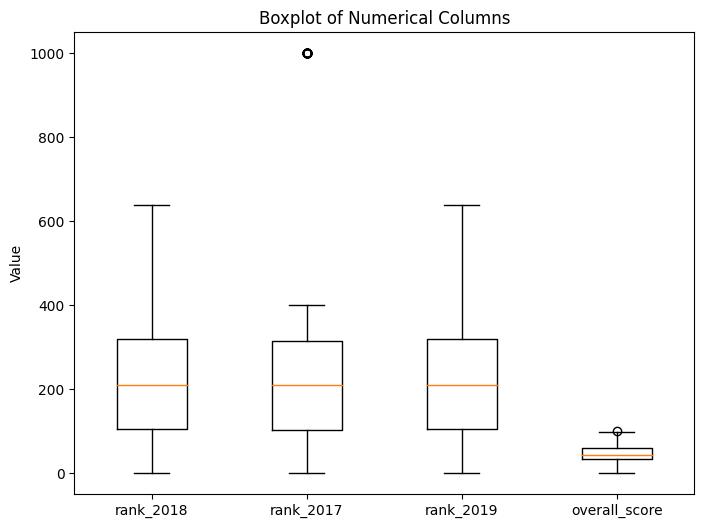

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([fix_df['rank_2018'], fix_df['rank_2017'], fix_df['rank_2019'], fix_df['overall_score']])
plt.xticks([1, 2, 3, 4], ['rank_2018', 'rank_2017', 'rank_2019', 'overall_score'])
plt.ylabel('Value')
plt.title('Boxplot of Numerical Columns')
plt.show()

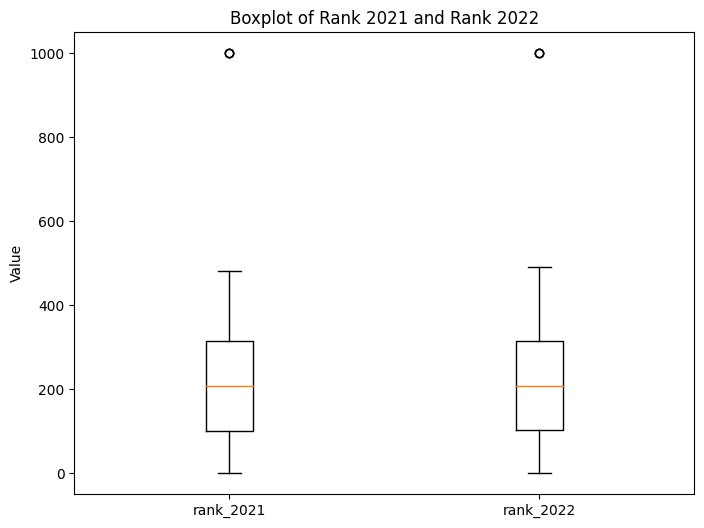

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([fix_df['rank_2021'], fix_df['rank_2022']])
plt.xticks([1, 2], ['rank_2021', 'rank_2022'])
plt.ylabel('Value')
plt.title('Boxplot of Rank 2021 and Rank 2022')
plt.show()

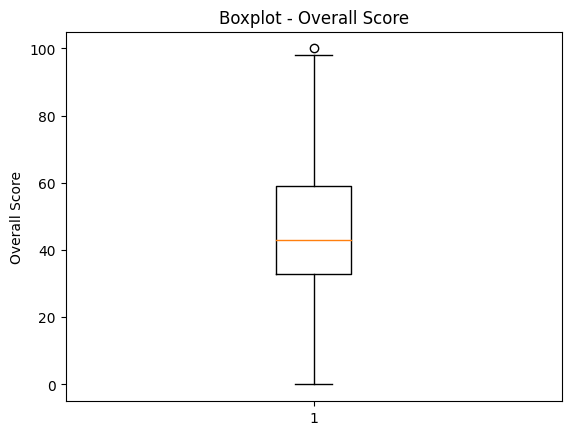

In [ ]:
plt.boxplot(fix_df['overall_score'])

plt.title('Boxplot - Overall Score')
plt.ylabel('Overall Score')
plt.show()

#Uji Linearitas

In [ ]:
fix_df.corr()

,rank_2018,rank_2017,age,rank_2019,Unnamed: 22,rank_2022,rank_2021,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank
rank_2018,1.000000,0.881722,-0.278474,0.941265,NaN,0.879793,0.886741,-0.651895,-0.836661,-0.797883,0.574149,0.491032,-0.341755,0.243618,-0.293315,0.217331
rank_2017,0.881722,1.000000,-0.260540,0.791840,NaN,0.743657,0.755162,-0.509063,-0.662994,-0.640987,0.498715,0.412066,-0.221964,0.186266,-0.240446,0.183574
age,-0.278474,-0.260540,1.000000,-0.272403,NaN,-0.255215,-0.241400,0.235962,0.263433,0.305884,-0.327160,-0.161059,0.050153,-0.065286,0.043421,-0.032223
rank_2019,0.941265,0.791840,-0.272403,1.000000,NaN,0.928811,0.946500,-0.714039,-0.917129,-0.848687,0.563108,0.486584,-0.399108,0.282522,-0.336869,0.208614
Unnamed: 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank_2022,0.879793,0.743657,-0.255215,0.928811,NaN,1.000000,0.958660,-0.647030,-0.798169,-0.761972,0.549040,0.473871,-0.344834,0.294563,-0.274996,0.196908
rank_2021,0.886741,0.755162,-0.241400,0.946500,NaN,0.958660,1.000000,-0.624302,-0.799145,-0.751395,0.532496,0.451883,-0.338879,0.264245,-0.291799,0.200863
employer_reputation_score,-0.651895,-0.509063,0.235962,-0.714039,NaN,-0.647030,-0.624302,1.000000,0.782422,0.787512,-0.467561,-0.663497,0.204826,-0.098914,0.233504,-0.097744
overall_score,-0.836661,-0.662994,0.263433,-0.917129,NaN,-0.798169,-0.799145,0.782422,1.000000,0.909333,-0.502347,-0.455373,0.457089,-0.291229,0.372073,-0.201107
academic_reputation_score,-0.797883,-0.640987,0.305884,-0.848687,NaN,-0.761972,-0.751395,0.787512,0.909333,1.000000,-0.625680,-0.510040,0.240290,-0.146503,0.170847,-0.074218


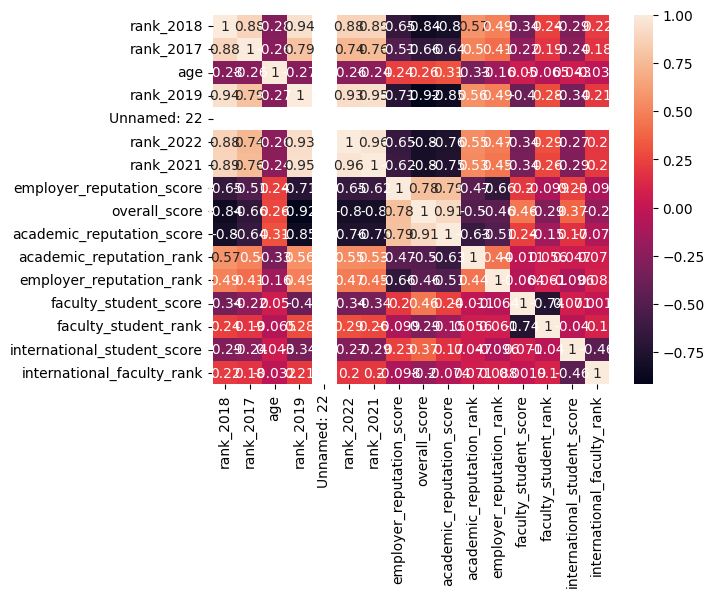

In [ ]:
sns.heatmap(fix_df.corr(), annot=True)
plt.show()

Hasil yang dapat disimpulkan:

Korelasi Positif: Terdapat korelasi positif yang cukup kuat antara variabel rank_2018 dengan rank_2017 (0.704489), rank_2019 (0.820991), dan age (-0.177435). Hal ini menunjukkan bahwa peringkat universitas cenderung berhubungan secara positif dari tahun ke tahun dan berkurang seiring bertambahnya usia universitas.

Korelasi Negatif: Terdapat korelasi negatif yang cukup kuat antara variabel rank_2018 dengan employer_reputation_score (-0.600188), overall_score (-0.769852), dan academic_reputation_score (-0.713175). Hal ini menunjukkan bahwa semakin rendah peringkat universitas, maka skor reputasi pengusaha, skor keseluruhan, dan skor reputasi akademik cenderung lebih rendah.

Korelasi Moderat: Terdapat korelasi moderat antara variabel overall_score dengan academic_reputation_score (0.937000), employer_reputation_score (0.820981), dan faculty_student_score (0.618253). Hal ini menunjukkan bahwa skor keseluruhan universitas cenderung dipengaruhi oleh skor reputasi akademik, skor reputasi pengusaha, dan skor fakultas-mahasiswa.

Korelasi Lemah: Terdapat beberapa korelasi lemah antara variabel lainnya seperti academic_reputation_rank dengan international_faculty_rank (0.223747) dan faculty_student_rank (0.217906), serta faculty_student_rank dengan international_student_score (0.217906). Korelasi lemah menunjukkan bahwa hubungan antara variabel tersebut tidak terlalu signifikan.

Peringkat universitas pada tahun 2018, 2017, 2019, 2022, dan 2021 memiliki korelasi yang tinggi antara satu sama lain, dengan koefisien korelasi di atas 0.88. Hal ini menunjukkan bahwa peringkat universitas cenderung stabil dalam jangka waktu tersebut.

Usia universitas memiliki korelasi negatif yang lemah dengan peringkat universitas. Ini menunjukkan bahwa semakin tua universitas, kemungkinan besar peringkatnya lebih rendah. Namun, korelasinya tidak terlalu kuat.

Skor reputasi pengusaha memiliki korelasi negatif yang moderat dengan peringkat universitas. Ini berarti semakin tinggi skor reputasi pengusaha, kemungkinan besar peringkat universitasnya lebih rendah.

Skor keseluruhan universitas memiliki korelasi negatif yang kuat dengan peringkat universitas. Dengan kata lain, semakin tinggi skor keseluruhan universitas, kemungkinan besar peringkatnya lebih rendah.

Skor reputasi akademik universitas memiliki korelasi negatif yang kuat dengan peringkat universitas. Ini menunjukkan bahwa semakin tinggi skor reputasi akademik, kemungkinan besar peringkat universitasnya lebih rendah.

Peringkat reputasi akademik memiliki korelasi positif yang moderat dengan peringkat universitas. Ini berarti semakin tinggi peringkat reputasi akademik, kemungkinan besar peringkat universitasnya lebih tinggi.

Skor mahasiswa-fakultas memiliki korelasi positif yang moderat dengan peringkat universitas. Ini menunjukkan bahwa semakin tinggi skor mahasiswa-fakultas, kemungkinan besar peringkat universitasnya lebih tinggi.

Skor mahasiswa internasional memiliki korelasi negatif yang lemah dengan peringkat universitas. Namun, korelasinya tidak terlalu signifikan.

Peringkat fakultas internasional memiliki korelasi positif yang lemah dengan peringkat universitas. Ini menunjukkan bahwa semakin tinggi peringkat fakultas internasional, kemungkinan besar peringkat universitasnya lebih tinggi.

In [ ]:
fix_df

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,rank_2021,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank
0,1.0,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,1.0,...,1,100.0,100,100.000,4,4,100.000,15,94.950,40
1,2.0,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,2.0,...,2,100.0,98,100.000,4,5,100.000,13,69.650,58
2,3.0,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,3.0,...,3,100.0,97,100.000,1,1,98.750,39,68.825,156
3,4.0,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,4.0,...,4,81.2,97,98.450,22,74,100.000,3,88.525,96
4,5.0,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,6.0,...,6,100.0,95,100.000,2,1,100.000,10,97.700,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,638.5,1000,FLORIDA STATE UNIVERSITY,United States,XL,FC,HI,5,A,472.0,...,472,43.3,26,19.900,237,185,12.000,1502,6.175,1790
396,638.5,1000,CONCORDIA UNIVERSITY,Canada,XL,CO,VH,3,A,464.0,...,464,36.2,26,11.250,1252,192,6.100,1502,88.625,199
397,638.5,1000,CHRISTIAN-ALBRECHTS-UNIVERSITÄT ZU KIEL,Germany,L,FC,VH,5,A,453.0,...,453,4.7,25,13.400,348,1252,55.850,263,13.100,142
398,638.5,1000,BOND UNIVERSITY,Australia,S,FC,HI,3,B,443.0,...,443,8.4,26,2.800,1252,1252,51.175,289,97.575,80


In [ ]:
fix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2018                    400 non-null    float64
 1   rank_2017                    400 non-null    int64  
 2   institution                  400 non-null    object 
 3   country                      400 non-null    object 
 4   classification               400 non-null    object 
 5   focus                        400 non-null    object 
 6   research_intensity           400 non-null    object 
 7   age                          400 non-null    int64  
 8   status                       400 non-null    object 
 9   rank_2019                    400 non-null    float64
 10  Unnamed: 22                  0 non-null      float64
 11  Unnamed: 23                  1 non-null      object 
 12  rank_2022                    400 non-null    int64  
 13  rank_2021           

In [ ]:
fix_df.columns

Index(['rank_2018', 'rank_2017', 'institution', 'country', 'classification',
       'focus', 'research_intensity', 'age', 'status', 'rank_2019',
       'Unnamed: 22', 'Unnamed: 23', 'rank_2022', 'rank_2021',
       'employer_reputation_score', 'overall_score',
       'academic_reputation_score', 'academic_reputation_rank',
       'employer_reputation_rank', 'faculty_student_score',
       'faculty_student_rank', 'international_student_score',
       'international_faculty_rank'],
      dtype='object')

<Axes: xlabel='faculty_student_rank', ylabel='overall_score'>

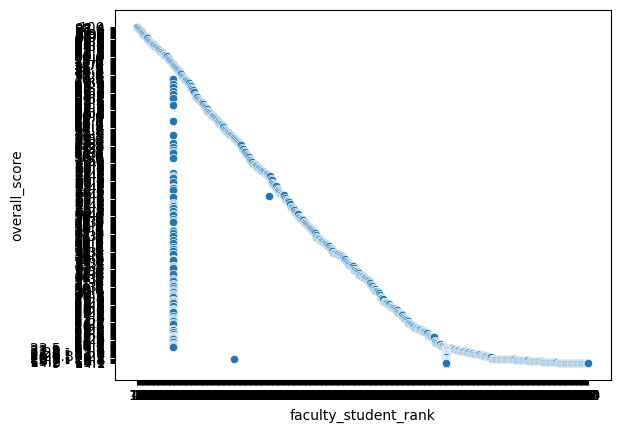

In [ ]:
sns.scatterplot(data=df, x="faculty_student_rank", y="overall_score")

In [ ]:
fix_df['rank_2018'] = fix_df['rank_2018'].astype(int)
fix_df['rank_2019'] = fix_df['rank_2019'].astype(int)


In [ ]:
fix_df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2018                    400 non-null    int64  
 1   rank_2017                    400 non-null    int64  
 2   institution                  400 non-null    object 
 3   country                      400 non-null    object 
 4   classification               400 non-null    object 
 5   focus                        400 non-null    object 
 6   research_intensity           400 non-null    object 
 7   age                          400 non-null    int64  
 8   status                       400 non-null    object 
 9   rank_2019                    400 non-null    int64  
 10  Unnamed: 22                  0 non-null      float64
 11  Unnamed: 23                  1 non-null      object 
 12  rank_2022                    400 non-null    int64  
 13  rank_2021           

<Axes: xlabel='institution', ylabel='rank_2018'>

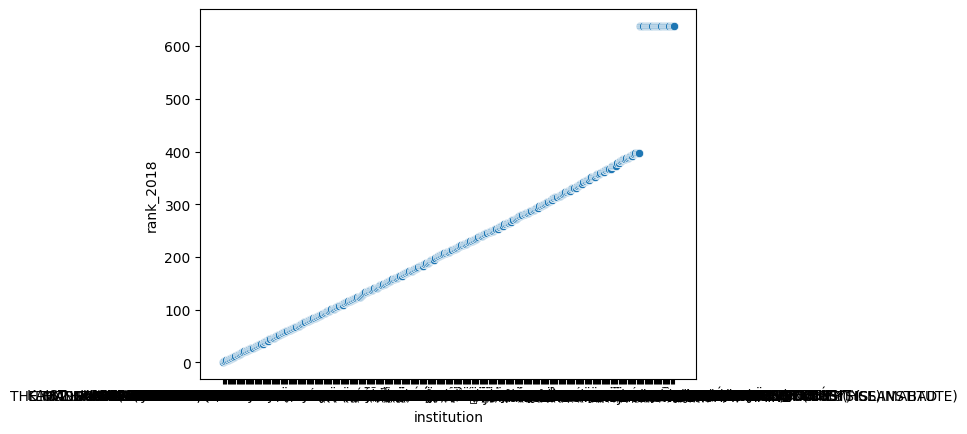

In [ ]:
sns.scatterplot(fix_df, x="institution", y="rank_2018")

Data saya rasa sudah cukup baik, selanjutnya akan masuk ke pemilihan machine learning


#Uji Heteroskedastisitas



In [ ]:
import pandas as pd
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import acorr_ljungbox, het_white
from scipy.stats import kstest, shapiro

In [ ]:
fix_df.columns

Index(['rank_2018', 'rank_2017', 'institution', 'country', 'classification',
       'focus', 'research_intensity', 'age', 'status', 'rank_2019',
       'Unnamed: 22', 'Unnamed: 23', 'rank_2022', 'rank_2021',
       'employer_reputation_score', 'overall_score',
       'academic_reputation_score', 'academic_reputation_rank',
       'employer_reputation_rank', 'faculty_student_score',
       'faculty_student_rank', 'international_student_score',
       'international_faculty_rank'],
      dtype='object')

In [ ]:
df = fix_df.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1)


In [ ]:
df.columns

Index(['rank_2018', 'rank_2017', 'institution', 'country', 'classification',
       'focus', 'research_intensity', 'age', 'status', 'rank_2019',
       'rank_2022', 'rank_2021', 'employer_reputation_score', 'overall_score',
       'academic_reputation_score', 'academic_reputation_rank',
       'employer_reputation_rank', 'faculty_student_score',
       'faculty_student_rank', 'international_student_score',
       'international_faculty_rank'],
      dtype='object')

In [ ]:
X = df[["rank_2018", "rank_2021"]]
Y = df["overall_score"]

In [ ]:
X = add_constant(X)

In [ ]:
X

,const,rank_2018,rank_2021
0,1.0,1,1
1,1.0,2,2
2,1.0,3,3
3,1.0,4,4
4,1.0,5,6
...,...,...,...
395,1.0,638,472
396,1.0,638,464
397,1.0,638,453
398,1.0,638,443


In [ ]:
model = OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          overall_score   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     499.4
Date:                Thu, 11 May 2023   Prob (F-statistic):          4.04e-109
Time:                        04:28:48   Log-Likelihood:                -1492.8
No. Observations:                 400   AIC:                             2992.
Df Residuals:                     397   BIC:                             3003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.3556      0.917     77.835      0.0

Model regresi OLS secara keseluruhan cukup baik dalam menjelaskan variabilitas overall_score dengan R-squared sebesar 0,716. Ini berarti sekitar 71,6% variasi dalam overall_score dapat dijelaskan oleh variabel independen (rank_2018 dan rank_2021) dalam model.

-Koefisien konstan (const) memiliki nilai sebesar 71,3556. Ini menunjukkan bahwa ketika kedua variabel independen (rank_2018 dan rank_2021) bernilai nol, diperkirakan nilai overall_score akan menjadi sekitar 71,3556.

-Koefisien rank_2018 memiliki nilai -0,0704, sedangkan koefisien rank_2021 memiliki nilai -0,0352. Ini menunjukkan bahwa perubahan satu unit dalam rank_2018 atau rank_2021 berhubungan dengan penurunan masing-masing sebesar 0,0704 dan 0,0352 unit dalam overall_score, jika variabel lainnya tetap konstan.

-Hasil uji t menunjukkan bahwa kedua variabel independen (rank_2018 dan rank_2021) memiliki signifikansi statistik dalam mempengaruhi overall_score dengan nilai p yang sangat kecil.

-Model juga menghasilkan beberapa metrik tambahan seperti F-statistic, Omnibus, Jarque-Bera (JB), Durbin-Watson, dan angka kondisi. Metrik ini memberikan wawasan tentang signifikansi keseluruhan model, distribusi residual, dan adanya masalah seperti multikolinearitas.

-Seluruh model diestimasi menggunakan metode Least Squares (LS), yang merupakan metode yang umum digunakan dalam regresi linier untuk menemukan hubungan linier terbaik antara variabel independen dan dependen.

##Modelling Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
X = df[["rank_2018", "rank_2021"]]
Y = df["overall_score"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(320, 2) (320,) (80, 2) (80,)


In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
example = [[50, 150]]
output = model.predict(example)
output

array([63.587614])

In [ ]:
X_test

,rank_2018,rank_2021
209,220,221
280,296,298
33,35,38
210,221,256
93,98,104
...,...,...
246,259,260
227,239,255
369,638,391
176,182,188


In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([47.66530169, 39.46276164, 67.52577435, 46.74310254, 60.67428538,
       61.51083035, 32.16664215, 60.5784517 , 41.79570795, 57.17137592,
       70.35984777, 28.54474046, 64.87118911, 63.28135372, 56.74092425,
       66.52152045, 40.07310142,  8.98416683, 45.35791355,  9.05604209,
       62.35995444, 69.43884843,  7.92999641, 40.75451657, 71.25648876,
        6.87582599, 58.03107944, 46.35078815, 41.19594761, 59.51450172,
        6.68415864, 49.41106677, 41.44731104, 64.93128512, 44.80686992,
       58.41481407, 59.0970291 , 31.46286831, 53.59579133, 54.7783336 ,
        8.72062422, 65.14651096, 62.68319313, 68.45855294, 62.03751563,
        7.57062013, 54.77993334, 50.9651645 , 69.0087967 , 51.50282915,
       65.94731827, 35.08796948, 32.64821013, 63.3885667 , -5.96588642,
       66.97593053, 46.56601398, 52.50868279, 67.89652994, 54.19395192,
       57.55391074, 38.30417779, 42.51166096, 62.46796729, 59.93317414,
       67.83683386, 31.19034602, 39.59193336,  6.58832496, 63.16

In [ ]:
Y_test

209    41
280    35
33     79
210    38
93     61
       ..
246    37
227    39
369    28
176    45
289    32
Name: overall_score, Length: 80, dtype: int64

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R Squared Score is:', r2_score(Y_test, Y_pred))

Mean Absolute Error: 8.172725899136069
Mean Squared Error: 117.92664910214535
Root Mean Squared Error: 10.859403717614764
R Squared Score is: 0.6965033737334122


Berdasarkan nilai-nilai diatas, kesimpulan yang dapat diambil bahwa model regresi OLS yang digunakan memiliki performa yang cukup baik dalam memprediksi overall_score. Meskipun terdapat beberapa tingkat kesalahan dalam prediksi, model mampu menjelaskan sekitar 69.65% variasi dalam overall_score dengan akurasi yang cukup tinggi. Namun, perlu diperhatikan bahwa kesimpulan ini tergantung pada konteks dan interpretasi dari metrik evaluasi yang digunakan

#Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,rank_2021,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,1,...,1,100.0,100,100.000,4,4,100.000,15,94.950,40
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,2,...,2,100.0,98,100.000,4,5,100.000,13,69.650,58
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,3,...,3,100.0,97,100.000,1,1,98.750,39,68.825,156
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,4,...,4,81.2,97,98.450,22,74,100.000,3,88.525,96
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,6,...,6,100.0,95,100.000,2,1,100.000,10,97.700,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,638,1000,FLORIDA STATE UNIVERSITY,United States,XL,FC,HI,5,A,472,...,472,43.3,26,19.900,237,185,12.000,1502,6.175,1790
396,638,1000,CONCORDIA UNIVERSITY,Canada,XL,CO,VH,3,A,464,...,464,36.2,26,11.250,1252,192,6.100,1502,88.625,199
397,638,1000,CHRISTIAN-ALBRECHTS-UNIVERSITÄT ZU KIEL,Germany,L,FC,VH,5,A,453,...,453,4.7,25,13.400,348,1252,55.850,263,13.100,142
398,638,1000,BOND UNIVERSITY,Australia,S,FC,HI,3,B,443,...,443,8.4,26,2.800,1252,1252,51.175,289,97.575,80


In [ ]:
df.columns

Index(['rank_2018', 'rank_2017', 'institution', 'country', 'classification',
       'focus', 'research_intensity', 'age', 'status', 'rank_2019',
       'rank_2022', 'rank_2021', 'employer_reputation_score', 'overall_score',
       'academic_reputation_score', 'academic_reputation_rank',
       'employer_reputation_rank', 'faculty_student_score',
       'faculty_student_rank', 'international_student_score',
       'international_faculty_rank'],
      dtype='object')

In [ ]:
X = df[["overall_score", "academic_reputation_score", "international_student_score"]]

In [ ]:
X

,overall_score,academic_reputation_score,international_student_score
0,100,100.000,94.950
1,98,100.000,69.650
2,97,100.000,68.825
3,97,98.450,88.525
4,95,100.000,97.700
...,...,...,...
395,26,19.900,6.175
396,26,11.250,88.625
397,25,13.400,13.100
398,26,2.800,97.575


In [ ]:
model_kmeans = KMeans(n_clusters=3)

In [ ]:
model_kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
model_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0,
       1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0,

In [ ]:
df['cluster'] = model_kmeans.labels_
df

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank,cluster
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,1,...,100.0,100,100.000,4,4,100.000,15,94.950,40,1
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,2,...,100.0,98,100.000,4,5,100.000,13,69.650,58,1
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,3,...,100.0,97,100.000,1,1,98.750,39,68.825,156,1
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,4,...,81.2,97,98.450,22,74,100.000,3,88.525,96,1
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,6,...,100.0,95,100.000,2,1,100.000,10,97.700,68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,638,1000,FLORIDA STATE UNIVERSITY,United States,XL,FC,HI,5,A,472,...,43.3,26,19.900,237,185,12.000,1502,6.175,1790,0
396,638,1000,CONCORDIA UNIVERSITY,Canada,XL,CO,VH,3,A,464,...,36.2,26,11.250,1252,192,6.100,1502,88.625,199,2
397,638,1000,CHRISTIAN-ALBRECHTS-UNIVERSITÄT ZU KIEL,Germany,L,FC,VH,5,A,453,...,4.7,25,13.400,348,1252,55.850,263,13.100,142,0
398,638,1000,BOND UNIVERSITY,Australia,S,FC,HI,3,B,443,...,8.4,26,2.800,1252,1252,51.175,289,97.575,80,2


In [ ]:
from sklearn import metrics

print('Akurasi: ', metrics.silhouette_score(X, model_kmeans.labels_))

Akurasi:  0.4418111231709129


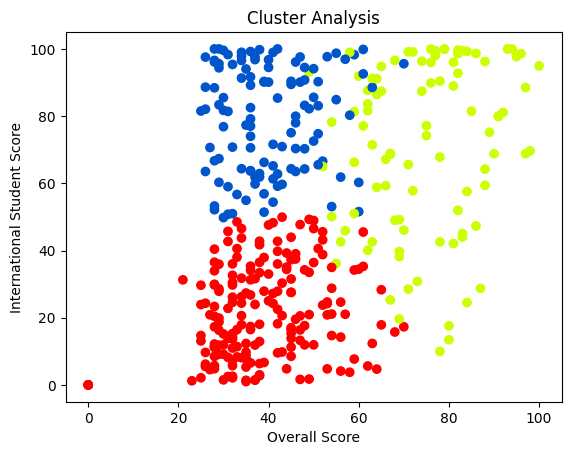

In [ ]:
import matplotlib.pyplot as plt

centroids = model_kmeans.cluster_centers_

x = [i[0] for i in centroids]
y = [i[1] for i in centroids]

df['x'] = df.cluster.map({0:x[0], 1:x[1], 2:x[2]})
df['y'] = df.cluster.map({0:y[0], 1:y[1], 2:y[2]})

colors = ['#ff0000', '#ccff00', '#0055cc']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(df['overall_score'], df['international_student_score'], c=df['c'])
plt.xlabel('Overall Score')
plt.ylabel('International Student Score')
plt.title('Cluster Analysis')
plt.show()

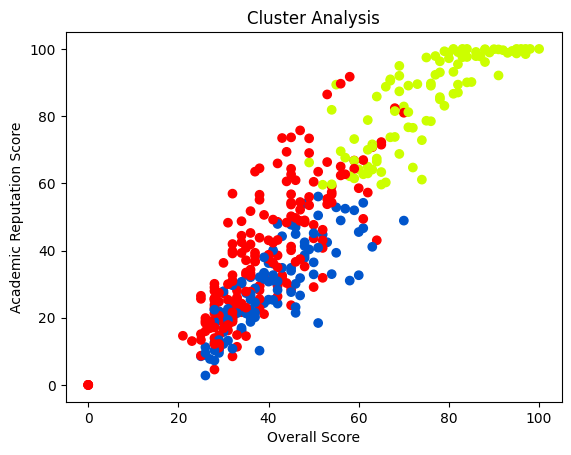

In [ ]:
import matplotlib.pyplot as plt

centroids = model_kmeans.cluster_centers_

x = [i[0] for i in centroids]
y = [i[1] for i in centroids]

df['x'] = df.cluster.map({0:x[0], 1:x[1], 2:x[2]})
df['y'] = df.cluster.map({0:y[0], 1:y[1], 2:y[2]})

colors = ['#ff0000', '#ccff00', '#0055cc']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(df['overall_score'], df['academic_reputation_score'], c=df['c'])
plt.xlabel('Overall Score')
plt.ylabel('Academic Reputation Score')
plt.title('Cluster Analysis')
plt.show()

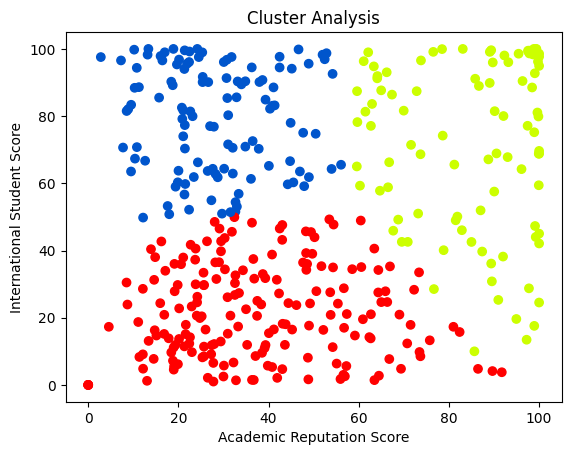

In [ ]:
import matplotlib.pyplot as plt

centroids = model_kmeans.cluster_centers_

x = [i[0] for i in centroids]
y = [i[1] for i in centroids]

df['x'] = df.cluster.map({0:x[0], 1:x[1], 2:x[2]})
df['y'] = df.cluster.map({0:y[0], 1:y[1], 2:y[2]})

colors = ['#ff0000', '#ccff00', '#0055cc']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(df['academic_reputation_score'], df['international_student_score'], c=df['c'])
plt.xlabel('Academic Reputation Score')
plt.ylabel('International Student Score')
plt.title('Cluster Analysis')
plt.show()

In [ ]:
df[df['cluster'] == 0]

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank,cluster,x,y,c
59,62,61,SHANGHAI JIAO TONG UNIVERSITY,China,XL,FC,VH,5,A,59,...,66,34,45.875,325,17.300,209,0,38.759162,37.915052,#ff0000
60,63,63,OSAKA UNIVERSITY,Japan,L,FC,VH,4,A,67,...,62,104,78.450,146,15.750,383,0,38.759162,37.915052,#ff0000
68,71,83,POHANG UNIVERSITY OF SCIENCE AND TECHNOLOGY (P...,South Korea,S,FO,VH,3,B,83,...,194,196,99.775,28,4.700,382,0,38.759162,37.915052,#ff0000
69,73,68,UNIVERSITY OF COPENHAGEN,Denmark,XL,FC,VH,5,A,79,...,83,201,99.950,22,28.325,155,0,38.759162,37.915052,#ff0000
73,76,75,TOHOKU UNIVERSITY,Japan,L,FC,VH,5,A,77,...,86,131,98.225,43,17.875,1502,0,38.759162,37.915052,#ff0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,638,1000,PONTIFICIA UNIVERSIDAD CATÓLICA DEL PERÚ,Peru,L,FO,MD,5,B,639,...,175,125,14.275,0,2.125,146,0,38.759162,37.915052,#ff0000
394,638,1000,XIAMEN UNIVERSITY,China,XL,FC,VH,4,A,476,...,245,1252,26.650,409,5.500,1502,0,38.759162,37.915052,#ff0000
395,638,1000,FLORIDA STATE UNIVERSITY,United States,XL,FC,HI,5,A,472,...,237,185,12.000,1502,6.175,1790,0,38.759162,37.915052,#ff0000
397,638,1000,CHRISTIAN-ALBRECHTS-UNIVERSITÄT ZU KIEL,Germany,L,FC,VH,5,A,453,...,348,1252,55.850,263,13.100,142,0,38.759162,37.915052,#ff0000


In [ ]:
df[df['cluster'] == 0].describe()

,rank_2018,rank_2017,age,rank_2019,rank_2022,rank_2021,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank,cluster,x,y
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.0,1.910000e+02,1.910000e+02
mean,287.958115,346.146597,4.439791,269.947644,269.748691,268.439791,34.678010,38.759162,37.915052,294.748691,429.256545,47.275916,518.968586,21.587304,565.528796,0.0,3.875916e+01,3.791505e+01
std,150.196953,278.014917,0.750640,111.998484,144.804259,142.047751,22.405916,11.821239,19.411330,297.911590,441.443806,29.692422,557.448718,13.775729,534.664369,0.0,1.424820e-14,1.424820e-14
min,62.000000,61.000000,2.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.875916e+01,3.791505e+01
25%,181.500000,185.000000,4.000000,185.000000,169.000000,179.000000,18.700000,31.000000,23.362500,146.000000,172.500000,21.262500,139.500000,9.775000,242.500000,0.0,3.875916e+01,3.791505e+01
50%,263.000000,264.000000,5.000000,264.000000,257.000000,257.000000,31.300000,37.000000,35.000000,223.000000,257.000000,43.300000,285.000000,20.550000,347.000000,0.0,3.875916e+01,3.791505e+01
75%,347.500000,347.000000,5.000000,349.500000,349.500000,344.000000,47.200000,46.000000,51.937500,318.000000,368.500000,75.950000,447.500000,33.200000,431.500000,0.0,3.875916e+01,3.791505e+01
max,638.000000,1000.000000,5.000000,639.000000,1000.000000,1000.000000,95.500000,70.000000,91.725000,1581.000000,1494.000000,100.000000,1774.000000,49.925000,1797.000000,0.0,3.875916e+01,3.791505e+01


In [ ]:
df[df['cluster'] == 1]

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank,cluster,x,y,c
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,1,...,4,4,100.000,15,94.950,40,1,74.946809,84.79734,#ccff00
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,2,...,4,5,100.000,13,69.650,58,1,74.946809,84.79734,#ccff00
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,3,...,1,1,98.750,39,68.825,156,1,74.946809,84.79734,#ccff00
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,4,...,22,74,100.000,3,88.525,96,1,74.946809,84.79734,#ccff00
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,6,...,2,1,100.000,10,97.700,68,1,74.946809,84.79734,#ccff00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,120,121,HUMBOLDT-UNIVERSITÄT ZU BERLIN,Germany,XL,FC,HI,5,A,121,...,49,137,12.900,1502,36.125,303,1,74.946809,84.79734,#ccff00
120,125,123,FREIE UNIVERSITÄT BERLIN,Germany,XL,FC,HI,4,A,130,...,64,170,6.200,1502,50.100,273,1,74.946809,84.79734,#ccff00
125,132,136,UNIVERSITY OF SOUTHERN CALIFORNIA,United States,XL,FC,VH,5,B,115,...,127,153,31.400,356,78.225,434,1,74.946809,84.79734,#ccff00
134,141,146,RHEINISCH-WESTFÄLISCHE TECHNISCHE HOCHSCHULE A...,Germany,XL,FC,VH,5,A,144,...,126,24,17.175,1502,65.025,382,1,74.946809,84.79734,#ccff00


In [ ]:
df[df['cluster'] == 1].describe()

,rank_2018,rank_2017,age,rank_2019,rank_2022,rank_2021,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank,cluster,x,y
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.0,9.400000e+01,94.00000
mean,54.340426,54.936170,4.776596,54.287234,54.053191,54.287234,78.661702,74.946809,84.797340,55.404255,81.765957,63.235372,302.670213,71.071809,235.042553,1.0,7.494681e+01,84.79734
std,36.191710,36.975089,0.570875,36.942449,36.358539,36.942449,20.018659,12.332636,13.870368,37.266353,68.576686,28.982628,400.756580,25.386442,305.024939,0.0,1.428705e-14,0.00000
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,30.500000,49.000000,59.575000,1.000000,1.000000,6.200000,3.000000,10.000000,15.000000,1.0,7.494681e+01,84.79734
25%,25.250000,24.500000,5.000000,25.250000,25.000000,25.250000,59.850000,65.000000,71.912500,25.000000,27.500000,37.450000,81.000000,49.425000,85.750000,1.0,7.494681e+01,84.79734
50%,49.500000,49.000000,5.000000,48.500000,48.500000,48.500000,83.250000,75.500000,89.225000,49.500000,65.000000,67.275000,192.500000,77.112500,160.000000,1.0,7.494681e+01,84.79734
75%,80.250000,80.750000,5.000000,77.250000,77.500000,77.250000,96.150000,83.750000,97.868750,84.250000,126.500000,90.087500,344.750000,94.912500,285.750000,1.0,7.494681e+01,84.79734
max,154.000000,155.000000,5.000000,175.000000,154.000000,175.000000,100.000000,100.000000,100.000000,127.000000,318.000000,100.000000,1792.000000,100.000000,1769.000000,1.0,7.494681e+01,84.79734


In [ ]:
df[df['cluster'] == 2]

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,rank_2019,...,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank,cluster,x,y,c
56,59,53,ECOLE POLYTECHNIQUE,France,S,CO,VH,5,A,65,...,170,12,99.600,32,95.600,123,2,40.182609,28.459783,#0055cc
85,89,90,RICE UNIVERSITY,United States,M,FC,VH,5,B,87,...,206,329,84.375,115,88.550,167,2,40.182609,28.459783,#0055cc
88,92,77,UNIVERSITY OF ST ANDREWS,United Kingdom,M,FC,VH,5,A,97,...,178,173,67.900,199,99.850,80,2,40.182609,28.459783,#0055cc
94,98,95,UNIVERSITY OF GENEVA,Switzerland,L,FC,VH,5,A,108,...,155,363,54.300,275,98.275,34,2,40.182609,28.459783,#0055cc
95,100,106,WASHINGTON UNIVERSITY IN ST. LOUIS,United States,L,FC,VH,5,B,100,...,183,365,99.750,30,60.275,237,2,40.182609,28.459783,#0055cc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,638,1000,SWINBURNE UNIVERSITY OF TECHNOLOGY,Australia,L,CO,VH,3,A,387,...,1252,329,17.600,1502,88.425,89,2,40.182609,28.459783,#0055cc
391,638,1000,UNIVERSIDAD DE PALERMO,Argentina,M,FO,MD,3,B,420,...,1252,1252,77.500,148,96.575,407,2,40.182609,28.459783,#0055cc
392,638,390,SWANSEA UNIVERSITY,United Kingdom,L,FC,HI,4,A,435,...,1252,1252,34.050,433,63.525,233,2,40.182609,28.459783,#0055cc
396,638,1000,CONCORDIA UNIVERSITY,Canada,XL,CO,VH,3,A,464,...,1252,192,6.100,1502,88.625,199,2,40.182609,28.459783,#0055cc


In [ ]:
df[df['cluster'] == 2].describe()

,rank_2018,rank_2017,age,rank_2019,rank_2022,rank_2021,employer_reputation_score,overall_score,academic_reputation_score,academic_reputation_rank,employer_reputation_rank,faculty_student_score,faculty_student_rank,international_student_score,international_faculty_rank,cluster,x,y
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000
mean,275.008696,317.652174,4.313043,254.617391,259.982609,254.730435,33.378261,40.182609,28.459783,470.191304,463.086957,43.288478,614.556522,79.133043,219.252174,2.0,40.182609,28.459783
std,140.728960,249.002221,0.787682,99.869615,104.582712,99.758596,21.643101,9.975041,12.635845,414.396409,439.229081,28.514103,594.657032,15.748202,267.950763,0.0,0.000000,0.000000
min,59.000000,53.000000,2.000000,65.000000,60.000000,65.000000,5.300000,25.000000,2.800000,118.000000,6.000000,6.100000,16.000000,49.800000,5.000000,2.0,40.182609,28.459783
25%,174.500000,171.000000,4.000000,173.500000,174.500000,173.500000,16.900000,32.000000,19.950000,225.000000,158.500000,20.037500,172.500000,64.300000,92.000000,2.0,40.182609,28.459783
50%,253.000000,249.000000,4.000000,248.000000,246.000000,248.000000,27.100000,39.000000,27.325000,302.000000,291.000000,35.650000,341.000000,81.725000,144.000000,2.0,40.182609,28.459783
75%,346.000000,343.500000,5.000000,332.000000,338.000000,332.000000,44.700000,47.000000,37.150000,360.000000,412.500000,65.787500,1502.000000,94.425000,243.000000,2.0,40.182609,28.459783
max,638.000000,1000.000000,5.000000,481.000000,491.000000,481.000000,100.000000,70.000000,56.075000,1496.000000,1252.000000,100.000000,1801.000000,100.000000,1502.000000,2.0,40.182609,28.459783


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

2 : 31.76418555172571
3 : 24.525507985553958
4 : 20.759631176577226
5 : 18.80413415942957
6 : 17.32335875866707
7 : 15.741410404813037
8 : 14.813447101086005
9 : 14.07769020505947


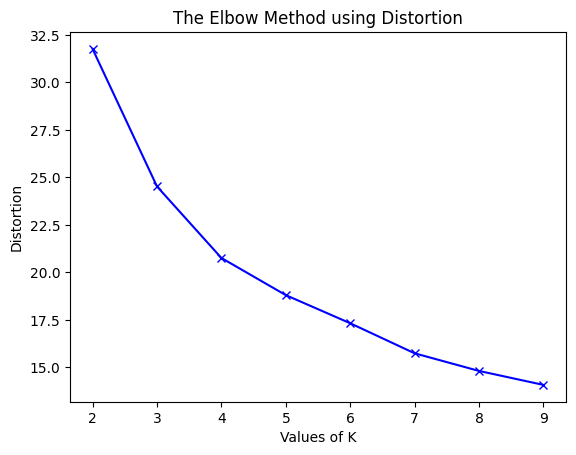

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()